# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

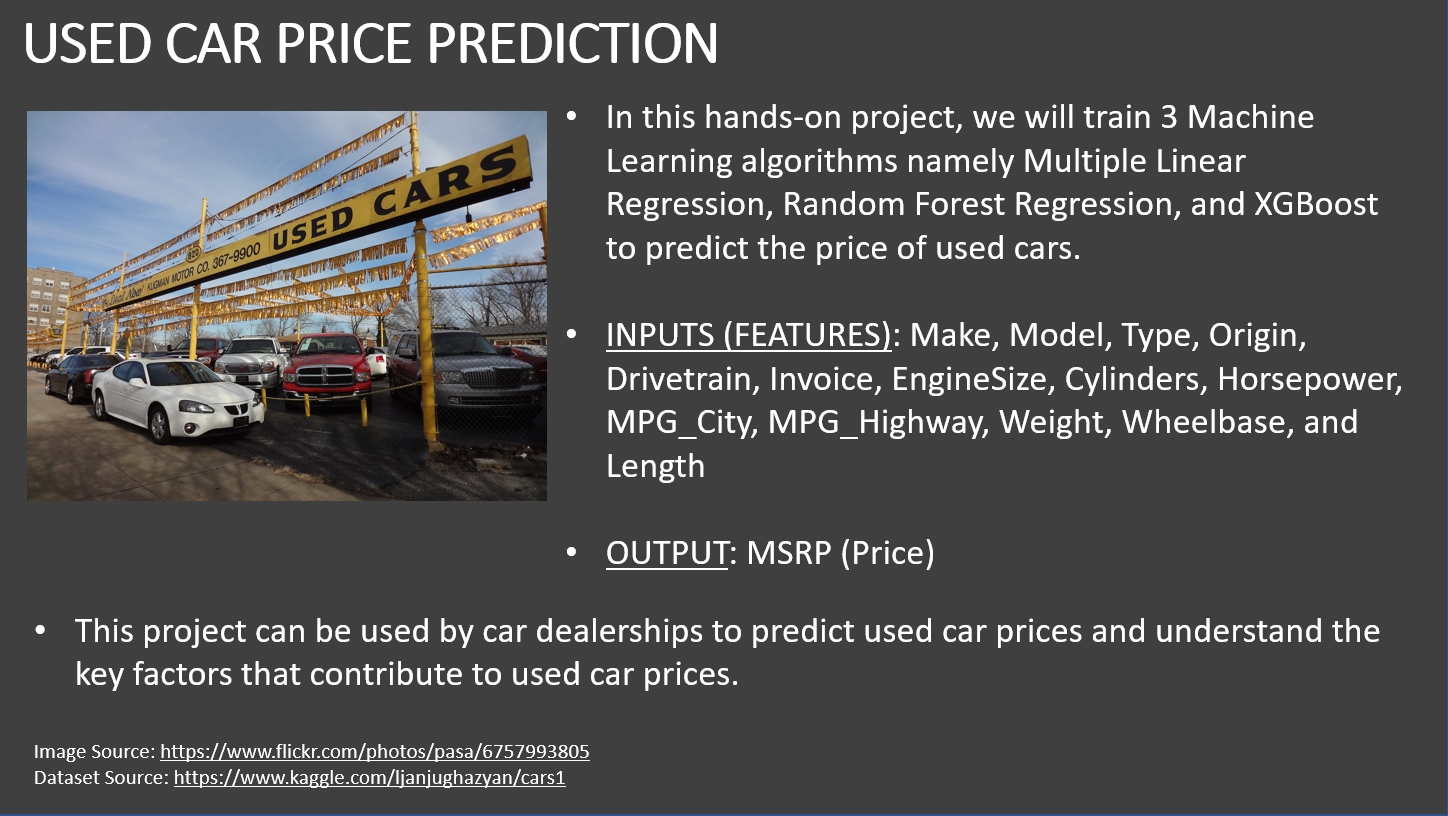

# TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
!pip install xgboost

In [ ]:
!pip install wordcloud

In [ ]:
!pip install plotly

In [2]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
from tqdm.notebook import tqdm
import plotly.express as px # Interactive Data Visualization
from sklearn.preprocessing import OneHotEncoder
#from jupyterthemes import jtplot # Jupyter Notebook Theme
#jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
pd.set_option('display.max_columns', 50)

In [3]:
# Read the CSV file 
df = pd.read_csv('Data/cars_data.csv',sep=',')

In [4]:
# Load the top 10 instances
df.head(10)

Make                    Model    Type  Origin DriveTrain     MSRP  \
0  Acura                      MDX     SUV    Asia        All  $36,945   
1  Acura           RSX Type S 2dr   Sedan    Asia      Front  $23,820   
2  Acura                  TSX 4dr   Sedan    Asia      Front  $26,990   
3  Acura                   TL 4dr   Sedan    Asia      Front  $33,195   
4  Acura               3.5 RL 4dr   Sedan    Asia      Front  $43,755   
5  Acura  3.5 RL w/Navigation 4dr   Sedan    Asia      Front  $46,100   
6  Acura   NSX coupe 2dr manual S  Sports    Asia       Rear  $89,765   
7   Audi              A4 1.8T 4dr   Sedan  Europe      Front  $25,940   
8   Audi   A41.8T convertible 2dr   Sedan  Europe      Front  $35,940   
9   Audi               A4 3.0 4dr   Sedan  Europe      Front  $31,840   

   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0  $33,337         3.5        6.0         265        17           23    4451   
1  $21,761         2.0        4.0         200        24           31    2778   
2  $24,647         2.4        4.0         200        22           29    3230   
3  $30,299         3.2        6.0         270        20           28    3575   
4  $39,014         3.5        6.0         225        18           24    3880   
5  $41,100         3.5        6.0         225        18           24    3893   
6  $79,978         3.2        6.0         290        17           24    3153   
7  $23,508         1.8        4.0         170        22           31    3252   
8  $32,506         1.8        4.0         170        23           30    3638   
9  $28,846         3.0        6.0         220        20           28    3462   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197  
5        115     197  
6        100     174  
7        104     179  
8        105     180  
9        104     179

In [5]:
# Load the bottom 10 instances 
df.tail(10)

Make                    Model   Type  Origin DriveTrain     MSRP  \
418  Volvo              S60 2.5 4dr  Sedan  Europe        All  $31,745   
419  Volvo               S60 T5 4dr  Sedan  Europe      Front  $34,845   
420  Volvo                S60 R 4dr  Sedan  Europe        All  $37,560   
421  Volvo              S80 2.9 4dr  Sedan  Europe      Front  $37,730   
422  Volvo             S80 2.5T 4dr  Sedan  Europe        All  $37,885   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
418  $29,916         2.5        5.0         208        20           27   
419  $32,902         2.3        5.0         247        20           28   
420  $35,382         2.5        5.0         300        18           25   
421  $35,542         2.9        6.0         208        20           28   
422  $35,688         2.5        5.0         194        20           27   
423  $38,203         2.4        5.0         197        21           28   
424  $40,083         2.3        5.0         242        20           26   
425  $42,573         2.9        6.0         268        19           26   
426  $24,641         1.9        4.0         170        22           29   
427  $33,112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  
418    3903        107     180  
419    3766        107     180  
420    3571        107     181  
421    3576        110     190  
422    3691        110     190  
423    3450        105     186  
424    3450        105     186  
425    3653        110     190  
426    2822        101     180  
427    3823        109     186

In [6]:
# Display the feature columns
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [7]:
# Check the shape of the dataframe
df.shape

(428, 15)

In [8]:
# Check if any missing values are present in the dataframe
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [9]:
# Obtain the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [10]:
df.nunique()

Make            38
Model          425
Type             6
Origin           3
DriveTrain       3
MSRP           410
Invoice        425
EngineSize      43
Cylinders        7
Horsepower     110
MPG_City        28
MPG_Highway     33
Weight         348
Wheelbase       40
Length          67
dtype: int64

In [11]:
# Convert MSRP and Invoice datatype to integer so we need to remove $ sign and comma (,) from these 2 columns
df[['Make','Type','Origin','DriveTrain','Model']] =df[['Make','Type','Origin','DriveTrain','Model']].astype('category')
df[['MSRP','Invoice']]=df[['MSRP','Invoice']].replace(r'[$,]','',regex=True)
df[['MSRP','Invoice']] =df[['MSRP','Invoice']].astype('int')

In [12]:
# Let's view the updated MSRP and Invoice Columns
df.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [13]:
# Display the updated summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Make         428 non-null    category
 1   Model        428 non-null    category
 2   Type         428 non-null    category
 3   Origin       428 non-null    category
 4   DriveTrain   428 non-null    category
 5   MSRP         428 non-null    int32   
 6   Invoice      428 non-null    int32   
 7   EngineSize   428 non-null    float64 
 8   Cylinders    426 non-null    float64 
 9   Horsepower   428 non-null    int64   
 10  MPG_City     428 non-null    int64   
 11  MPG_Highway  428 non-null    int64   
 12  Weight       428 non-null    int64   
 13  Wheelbase    428 non-null    int64   
 14  Length       428 non-null    int64   
dtypes: category(5), float64(2), int32(2), int64(6)
memory usage: 54.0 KB


MINI CHALLENGE #2:

- What is the maximum price of the used car?
- What is the minimum price of the used car?

In [70]:
df.describe()
# Max = 192465
# Min = 10280

MSRP        Invoice  EngineSize   Cylinders  Horsepower  \
count     428.000000     428.000000  428.000000  426.000000  428.000000   
mean    32774.855140   30014.700935    3.196729    5.807512  215.885514   
std     19431.716674   17642.117750    1.108595    1.558443   71.836032   
min     10280.000000    9875.000000    1.300000    3.000000   73.000000   
25%     20334.250000   18866.000000    2.375000    4.000000  165.000000   
50%     27635.000000   25294.500000    3.000000    6.000000  210.000000   
75%     39205.000000   35710.250000    3.900000    6.000000  255.000000   
max    192465.000000  173560.000000    8.300000   12.000000  500.000000   

         MPG_City  MPG_Highway       Weight   Wheelbase      Length  
count  428.000000   428.000000   428.000000  428.000000  428.000000  
mean    20.060748    26.843458  3577.953271  108.154206  186.362150  
std      5.238218     5.741201   758.983215    8.311813   14.357991  
min     10.000000    12.000000  1850.000000   89.000000  143.000000  
25%     17.000000    24.000000  3104.000000  103.000000  178.000000  
50%     19.000000    26.000000  3474.500000  107.000000  187.000000  
75%     21.250000    29.000000  3977.750000  112.000000  194.000000  
max     60.000000    66.000000  7190.000000  144.000000  238.000000

# TASK #3: PERFORM DATA VISUALIZATION - PART #1

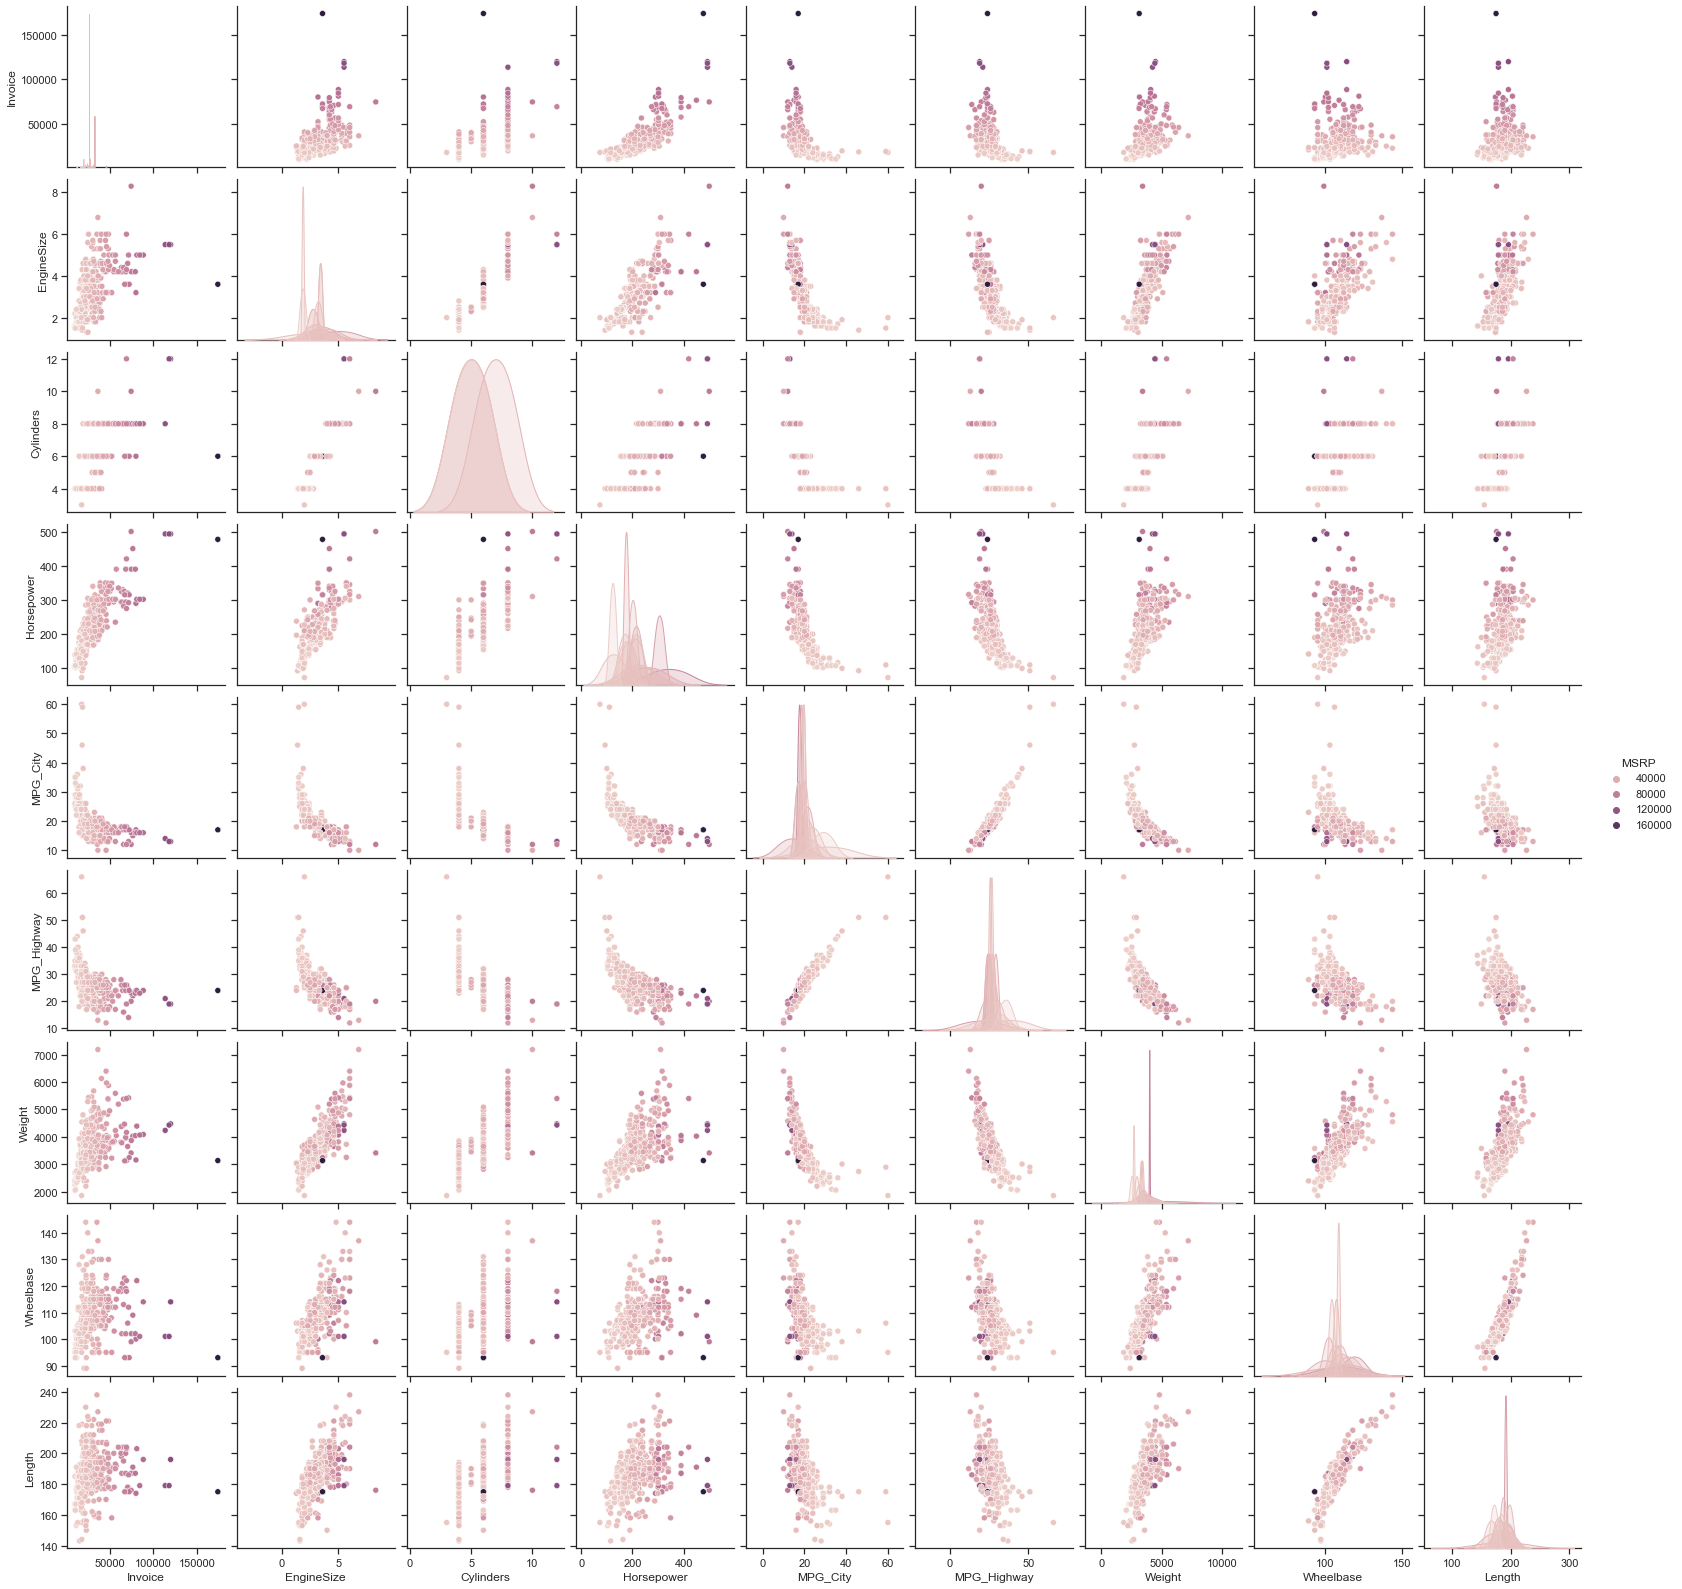

In [87]:
# scatterplots for joint relationships and histograms for univariate distributions
#sns.set_palette('bright')
#sns.set_theme(style="ticks")
sns.pairplot(df, hue="MSRP")

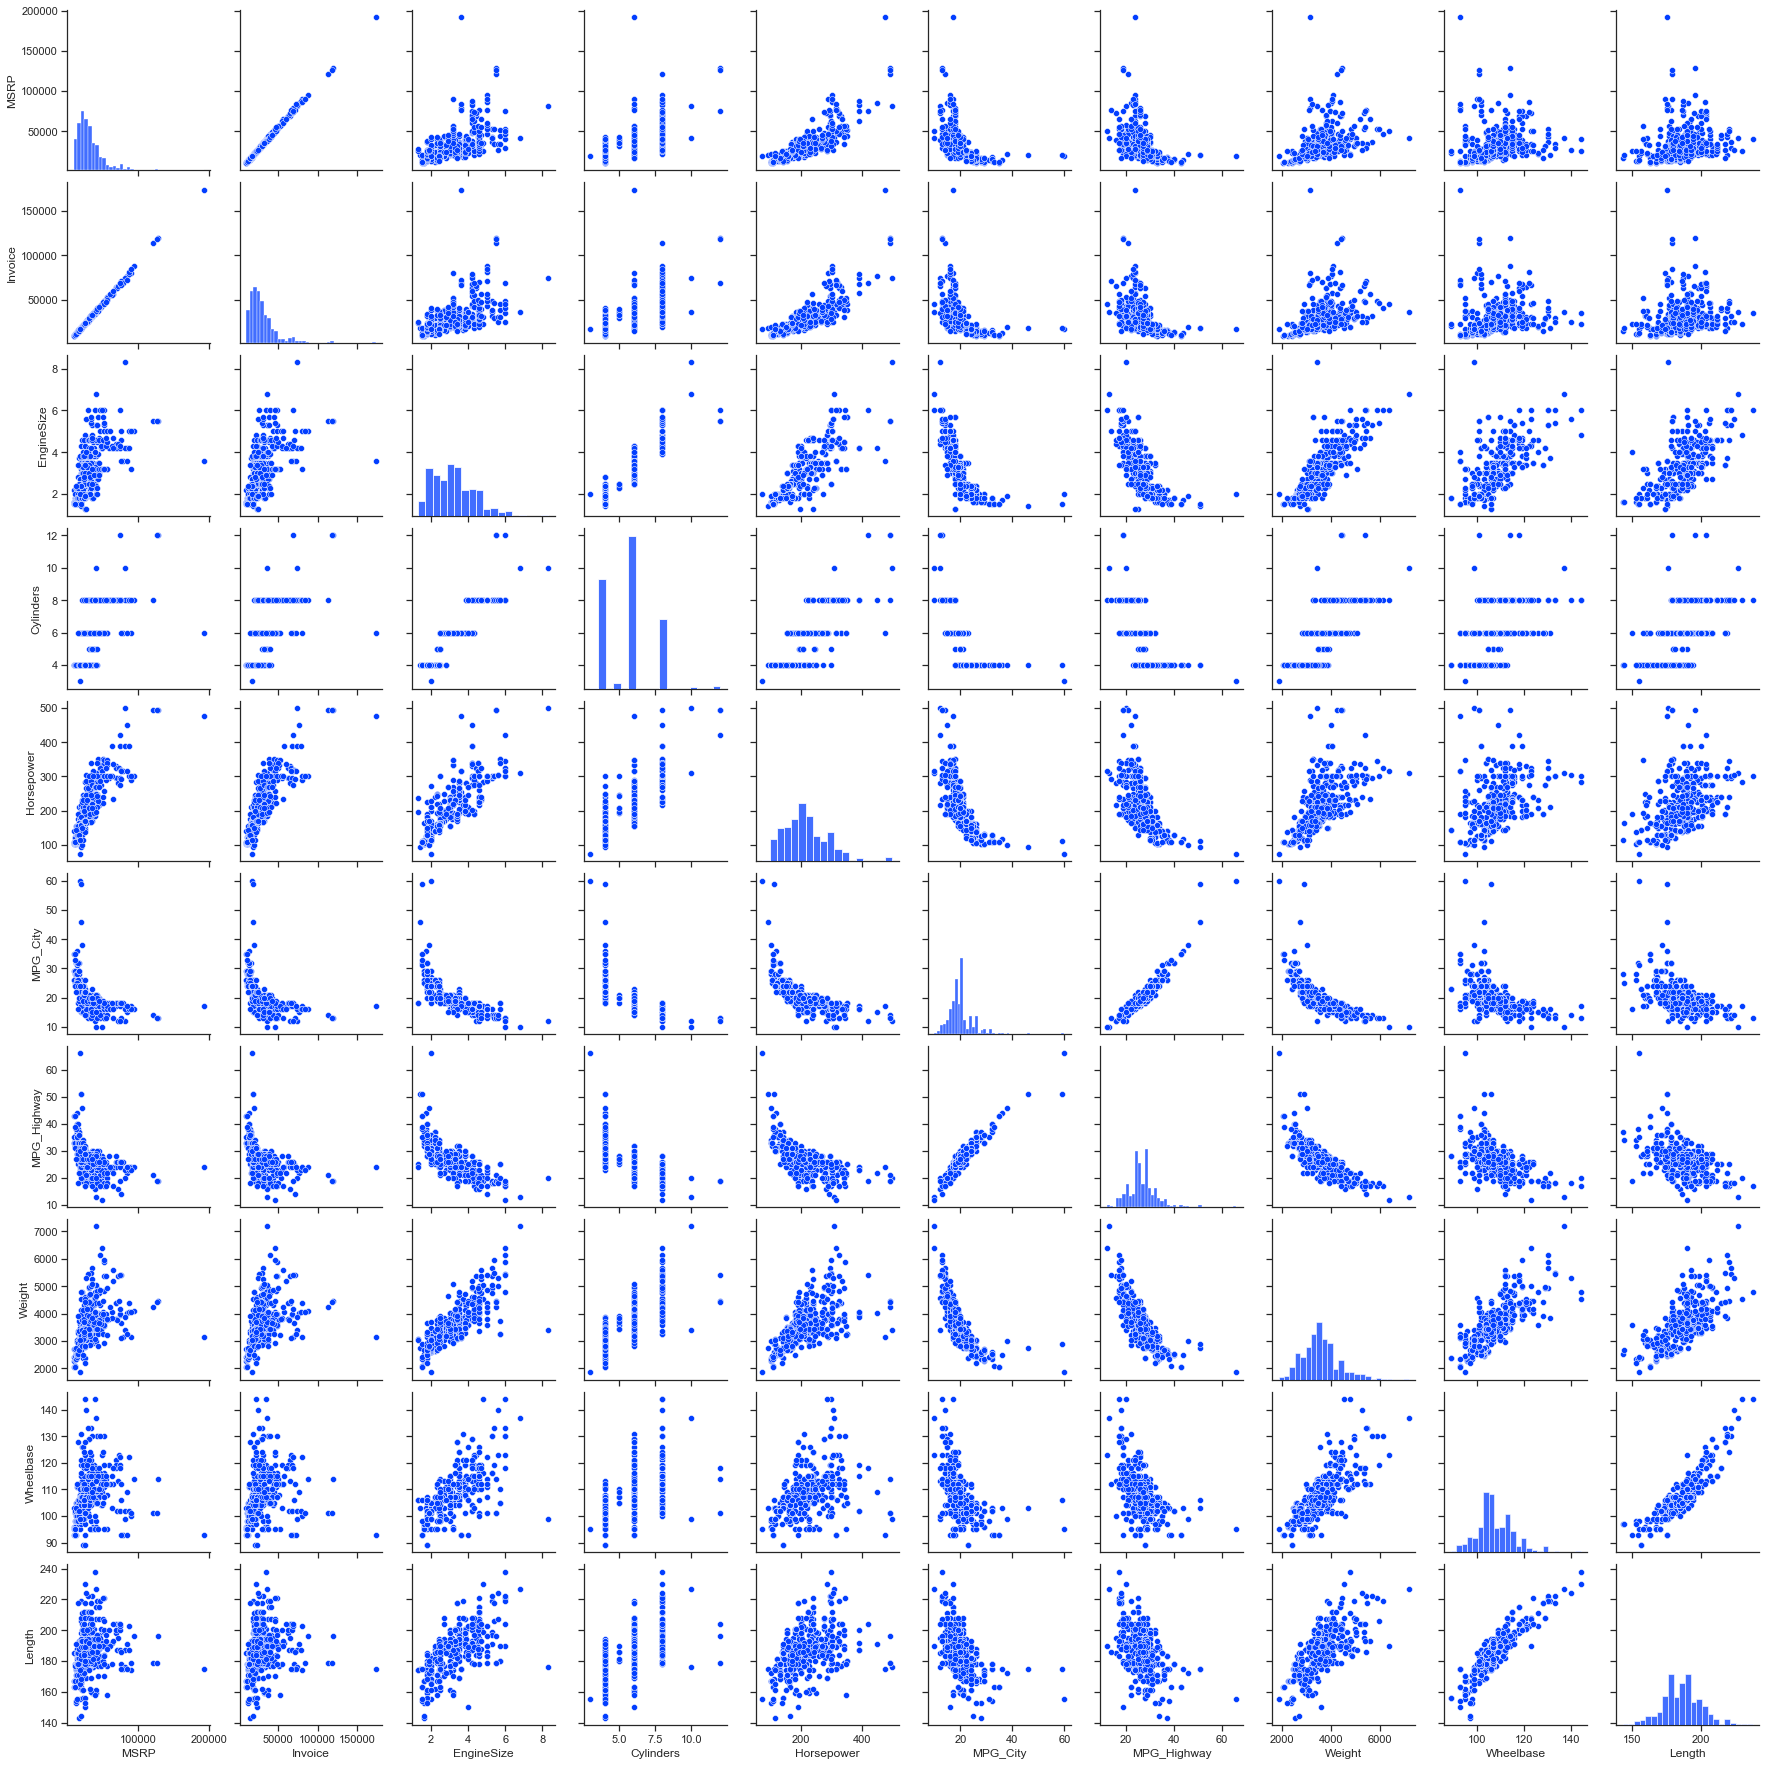

In [83]:
sns.pairplot(df,palette='hls',diag_kind='hist')
plt.show()

In [88]:
# Let's view various makes of the cars
df['Make'].unique()

['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', ..., 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo']
Length: 38
Categories (38, object): ['Acura', 'Audi', 'BMW', 'Buick', ..., 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo']

In [92]:
fig = px.histogram(df, x = "Make",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR",
                  color_discrete_sequence = ["maroon"])
                  
fig.show()

In [93]:
# Let's view various types of the cars
df.Type.unique()

['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid']
Categories (6, object): ['Hybrid', 'SUV', 'Sedan', 'Sports', 'Truck', 'Wagon']

In [94]:
fig = px.histogram(df, x = "Type",
                  labels = {"Type":"Type"},
                  title = "TYPE OF THE CAR",
                  color_discrete_sequence = ["blue"])
                  
fig.show()

In [95]:
# Let's plot the location
df.Origin.unique()

['Asia', 'Europe', 'USA']
Categories (3, object): ['Asia', 'Europe', 'USA']

In [96]:
fig = px.histogram(df, x = "Origin",
                  labels = {"Origin":"Origin"},
                  title = "LOCATION OF THE CAR SALES",
                  color_discrete_sequence = ["brown"])
                  
fig.show()

In [97]:
# Let's view the drivetrain of the cars
df.DriveTrain.unique()

['All', 'Front', 'Rear']
Categories (3, object): ['All', 'Front', 'Rear']

In [98]:
fig = px.histogram(df, x = "DriveTrain",
                  labels = {"DriveTrain":"Drivetrain"},
                  title = "DRIVETRAIN OF THE CAR",
                  color_discrete_sequence = ["BLACK"])
                  
fig.show()

In [99]:
# Plot the make of the car and its location
fig = px.histogram(df, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show()

MINI CHALLENGE #3:

- Plot the plotly histogram of Make and Type of the car
- Find out which manufacturer has high number of Sports type 
- Find out which manufacturers has Hybrid

In [103]:
# Plot the make of the car and its location
fig = px.histogram(df, x = "Make",
                  color = "Type",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show()

Porsche has the the hightest number of sport type
Honta has the highest number of hybrid type 

# TASK #4: PERFORM DATA VISUALIZATION - PART #2

In [100]:
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS

In [105]:
df

Make                    Model   Type  Origin DriveTrain   MSRP  Invoice  \
0    Acura                      MDX    SUV    Asia        All  36945    33337   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23820    21761   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26990    24647   
3    Acura                   TL 4dr  Sedan    Asia      Front  33195    30299   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43755    39014   
..     ...                      ...    ...     ...        ...    ...      ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40565    38203   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42565    40083   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  45210    42573   
426  Volvo                      V40  Wagon  Europe      Front  26135    24641   
427  Volvo                     XC70  Wagon  Europe        All  35145    33112   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0           3.5        6.0         265        17           23    4451   
1           2.0        4.0         200        24           31    2778   
2           2.4        4.0         200        22           29    3230   
3           3.2        6.0         270        20           28    3575   
4           3.5        6.0         225        18           24    3880   
..          ...        ...         ...       ...          ...     ...   
423         2.4        5.0         197        21           28    3450   
424         2.3        5.0         242        20           26    3450   
425         2.9        6.0         268        19           26    3653   
426         1.9        4.0         170        22           29    2822   
427         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  
0          106     189  
1          101     172  
2          105     183  
3          108     186  
4          115     197  
..         ...     ...  
423        105     186  
424        105     186  
425        110     190  
426        101     180  
427        109     186  

[428 rows x 15 columns]

In [106]:
text = df.Model.values

In [107]:
stopwords = set(STOPWORDS)

In [108]:
wc = WordCloud(background_color = "black", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(text))          

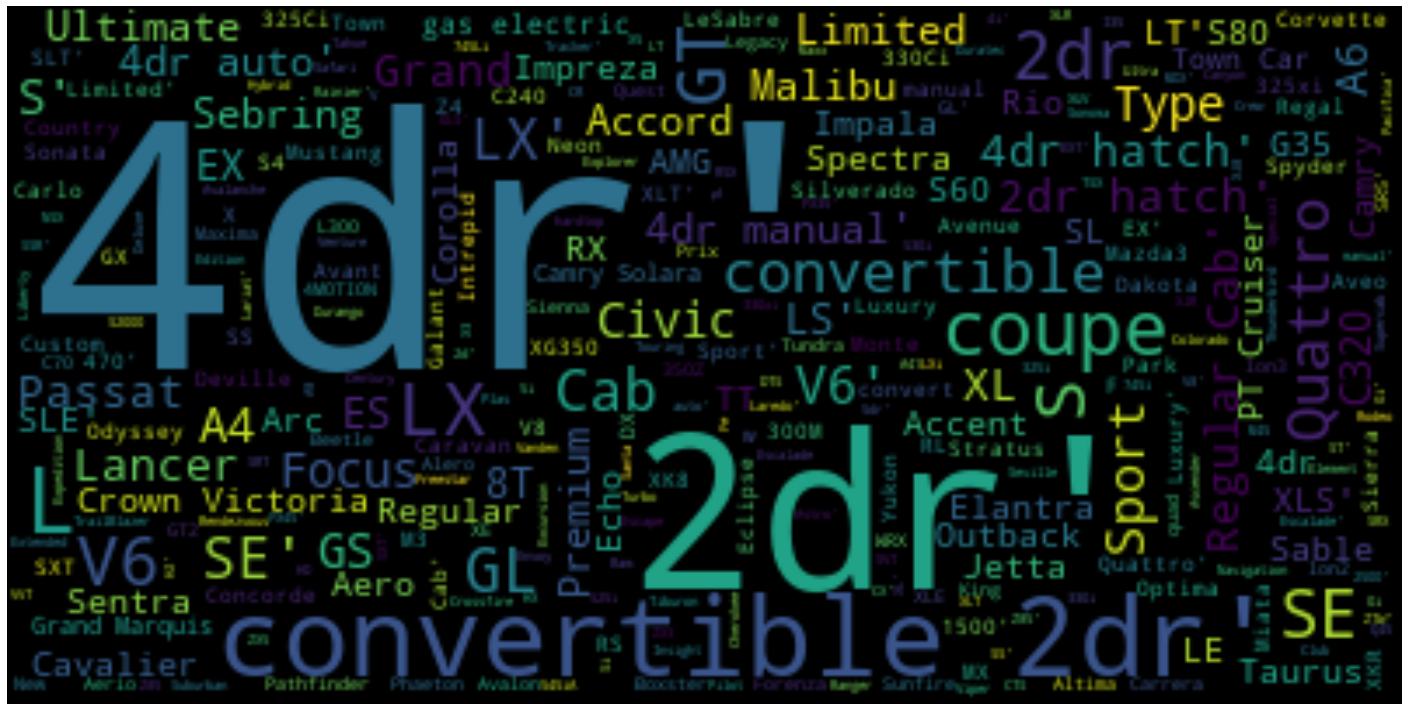

In [109]:
fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [118]:
# Obtain the correlation matrix
df_corr=df.corr()
df_corr

MSRP   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.000000  0.999132    0.571753   0.649742    0.826945 -0.475020   
Invoice      0.999132  1.000000    0.564498   0.645226    0.823746 -0.470442   
EngineSize   0.571753  0.564498    1.000000   0.908002    0.787435 -0.709471   
Cylinders    0.649742  0.645226    0.908002   1.000000    0.810341 -0.684402   
Horsepower   0.826945  0.823746    0.787435   0.810341    1.000000 -0.676699   
MPG_City    -0.475020 -0.470442   -0.709471  -0.684402   -0.676699  1.000000   
MPG_Highway -0.439622 -0.434585   -0.717302  -0.676100   -0.647195  0.941021   
Weight       0.448426  0.442332    0.807867   0.742209    0.630796 -0.737966   
Wheelbase    0.152000  0.148328    0.636517   0.546730    0.387398 -0.507284   
Length       0.172037  0.166586    0.637448   0.547783    0.381554 -0.501526   

             MPG_Highway    Weight  Wheelbase    Length  
MSRP           -0.439622  0.448426   0.152000  0.172037  
Invoice        -0.434585  0.442332   0.148328  0.166586  
EngineSize     -0.717302  0.807867   0.636517  0.637448  
Cylinders      -0.676100  0.742209   0.546730  0.547783  
Horsepower     -0.647195  0.630796   0.387398  0.381554  
MPG_City        0.941021 -0.737966  -0.507284 -0.501526  
MPG_Highway     1.000000 -0.790989  -0.524661 -0.466092  
Weight         -0.790989  1.000000   0.760703  0.690021  
Wheelbase      -0.524661  0.760703   1.000000  0.889195  
Length         -0.466092  0.690021   0.889195  1.000000

In [116]:
fig = px.imshow(df.corr(), text_auto=True)
fig.show()

MINI CHALLENGE #4: 
- Comment on the correlation matrix, which feature has the highest positive correlation with MSRP?

In [128]:
df_corr.iloc[0,1:].sort_values(ascending=False)
# HorsePOwer is the feature with the hightest positive correlation 

Invoice        0.999132
Horsepower     0.826945
Cylinders      0.649742
EngineSize     0.571753
Weight         0.448426
Length         0.172037
Wheelbase      0.152000
MPG_Highway   -0.439622
MPG_City      -0.475020
Name: MSRP, dtype: float64

# TASK #5: PREPARE THE DATA BEFORE MODEL TRAINING

In [11]:
df.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [14]:
num_features=df.select_dtypes(include=['float','int']).columns[1:].tolist()
cat_features = df.select_dtypes(exclude=['float','int']).columns.tolist()
target=['MSRP']

In [15]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
enc_df=pd.get_dummies(df,columns=cat_features)
enc_df.dtypes

MSRP                  int32
Invoice               int32
EngineSize          float64
Cylinders           float64
Horsepower            int64
                     ...   
Origin_Europe         uint8
Origin_USA            uint8
DriveTrain_All        uint8
DriveTrain_Front      uint8
DriveTrain_Rear       uint8
Length: 485, dtype: object

In [16]:
enc_df['Cylinders']=enc_df['Cylinders'].fillna(enc_df['Cylinders'].mean())

In [73]:
# Feeding input features to X and output (MSRP) to y
X = enc_df.drop(["MSRP",'Invoice'], axis = 1)
y = enc_df["MSRP"] 

In [76]:
X = np.array(X)

In [77]:
y = np.array(y)

In [78]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

MINI CHALLENGE #5:

- Verify that the split was successful 

In [194]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,(X_train.shape[0])/(X_train.shape[0]+X_test.shape[0])


((342, 483), (86, 483), (342,), (86,), 0.7990654205607477)

# TASK #5: TRAIN AND EVALUATE A MULTIPLE LINEAR REGRESSION

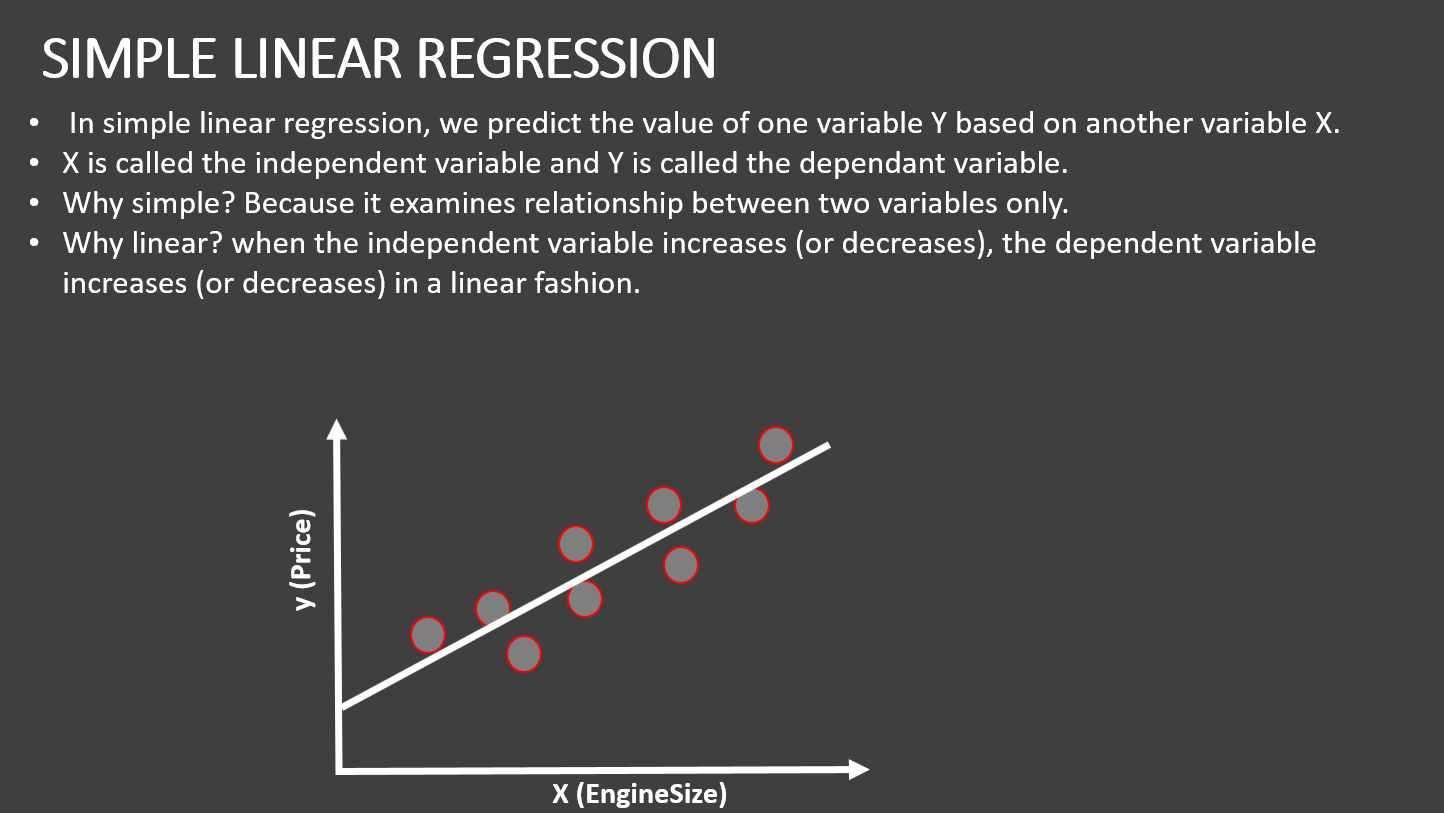

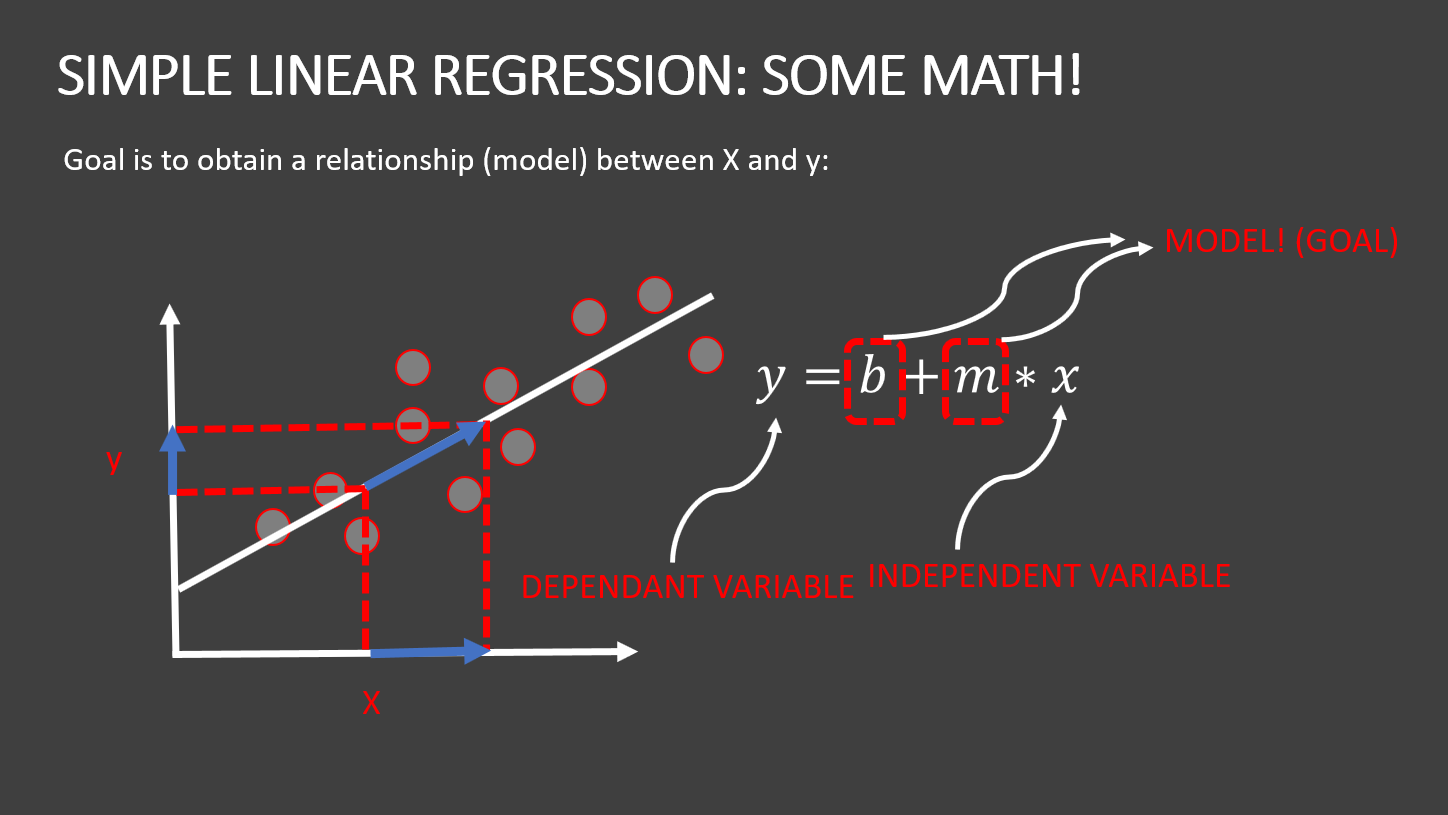

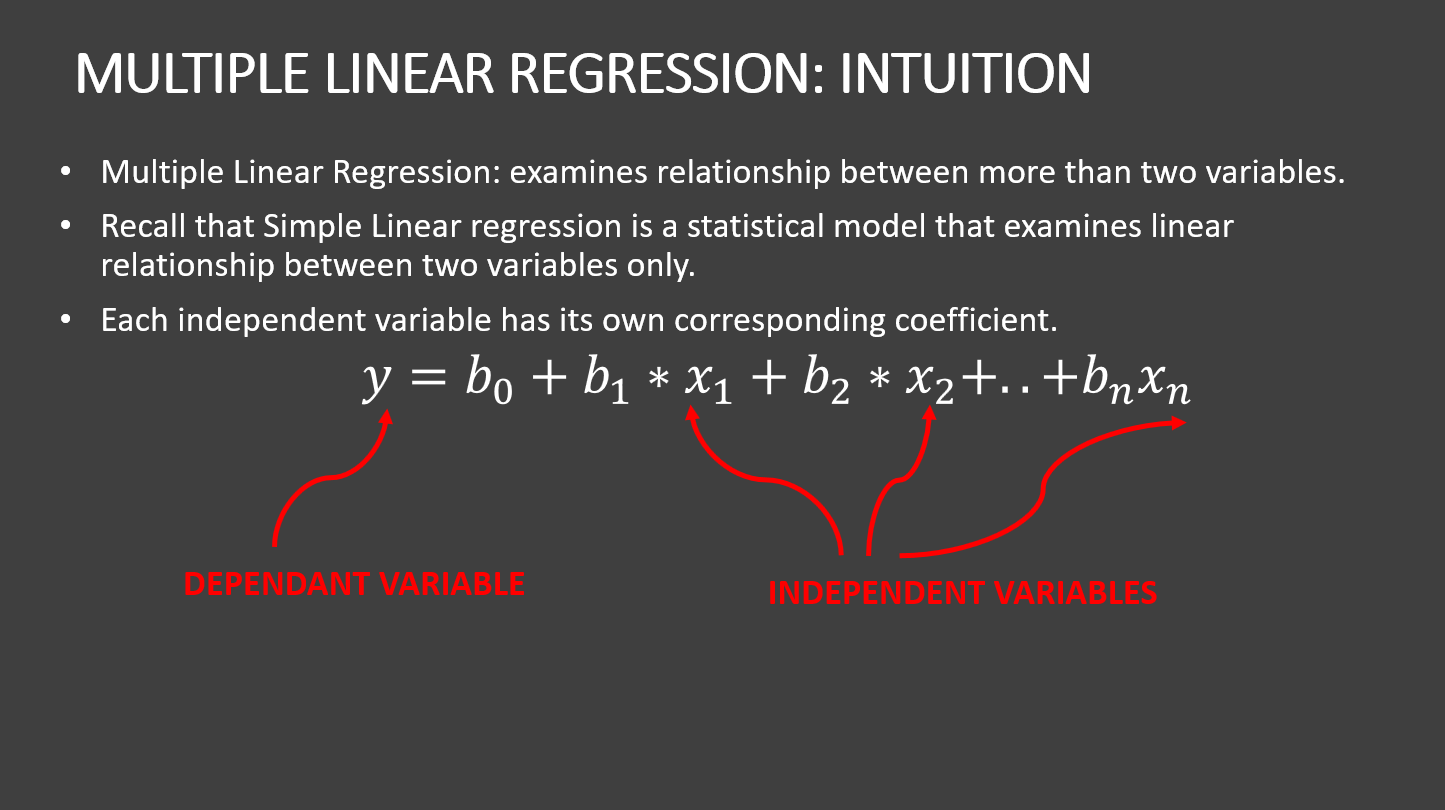

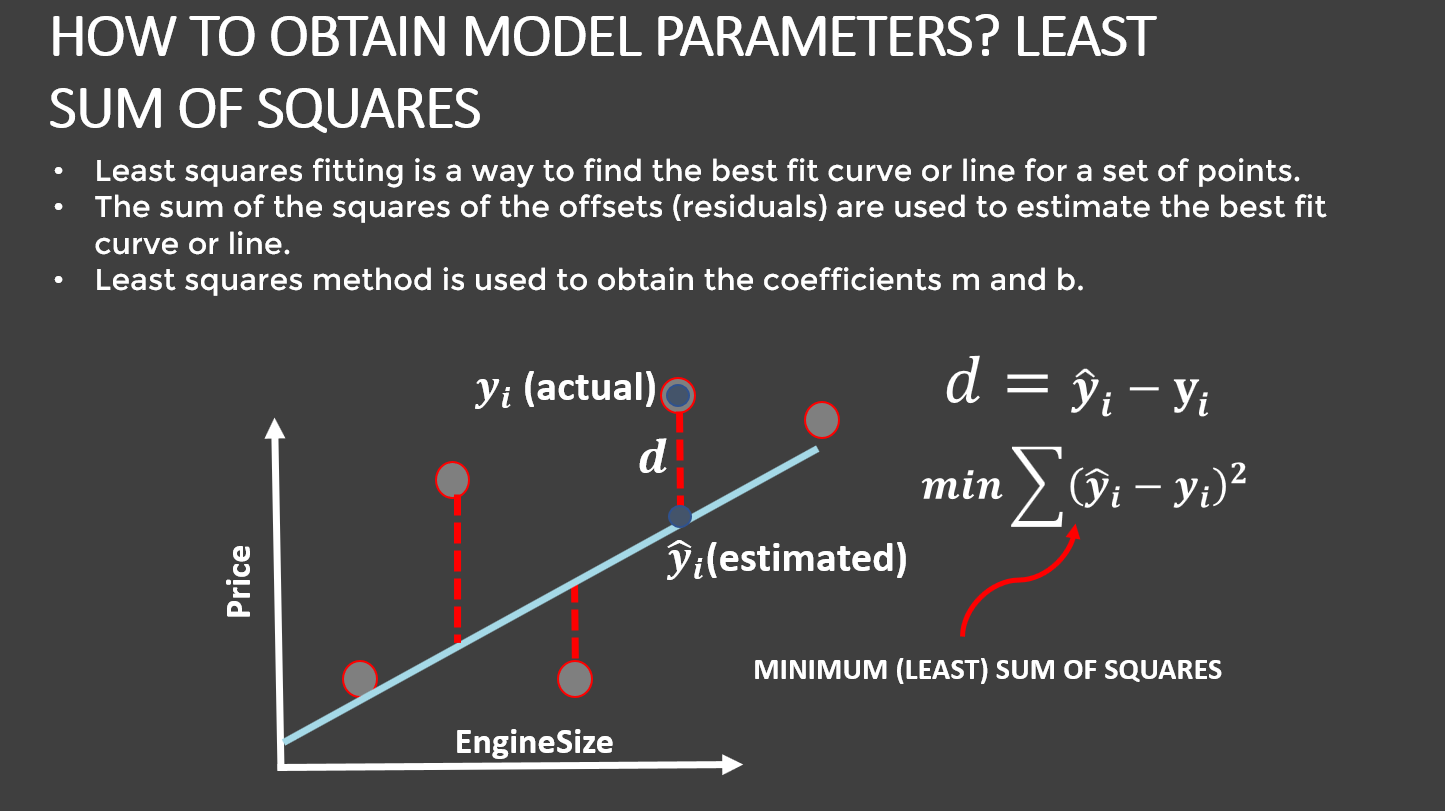

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [196]:
Lin_model=LinearRegression()
Lin_model.fit(X_train,y_train)
y_pred=Lin_model.predict(X_test)

In [197]:
accuracy_LinearRegression = Lin_model.score(X_test, y_test)
print(f' Acc:  {accuracy_LinearRegression} \n R2 : {r2_score(y_test,y_pred)}')


 Acc:  0.77874437702972 
 R2 : 0.77874437702972


# TASK #6: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS 

In [198]:
# Photo Credits:
# https://creazilla.com/nodes/22202-giraffe-clipart 
# https://pixy.org/4569488/ 
# https://pixabay.com/illustrations/monkey-animal-gorilla-zoo-nature-4187960/ 
# https://creazilla.com/nodes/15581-running-tiger-clipart 

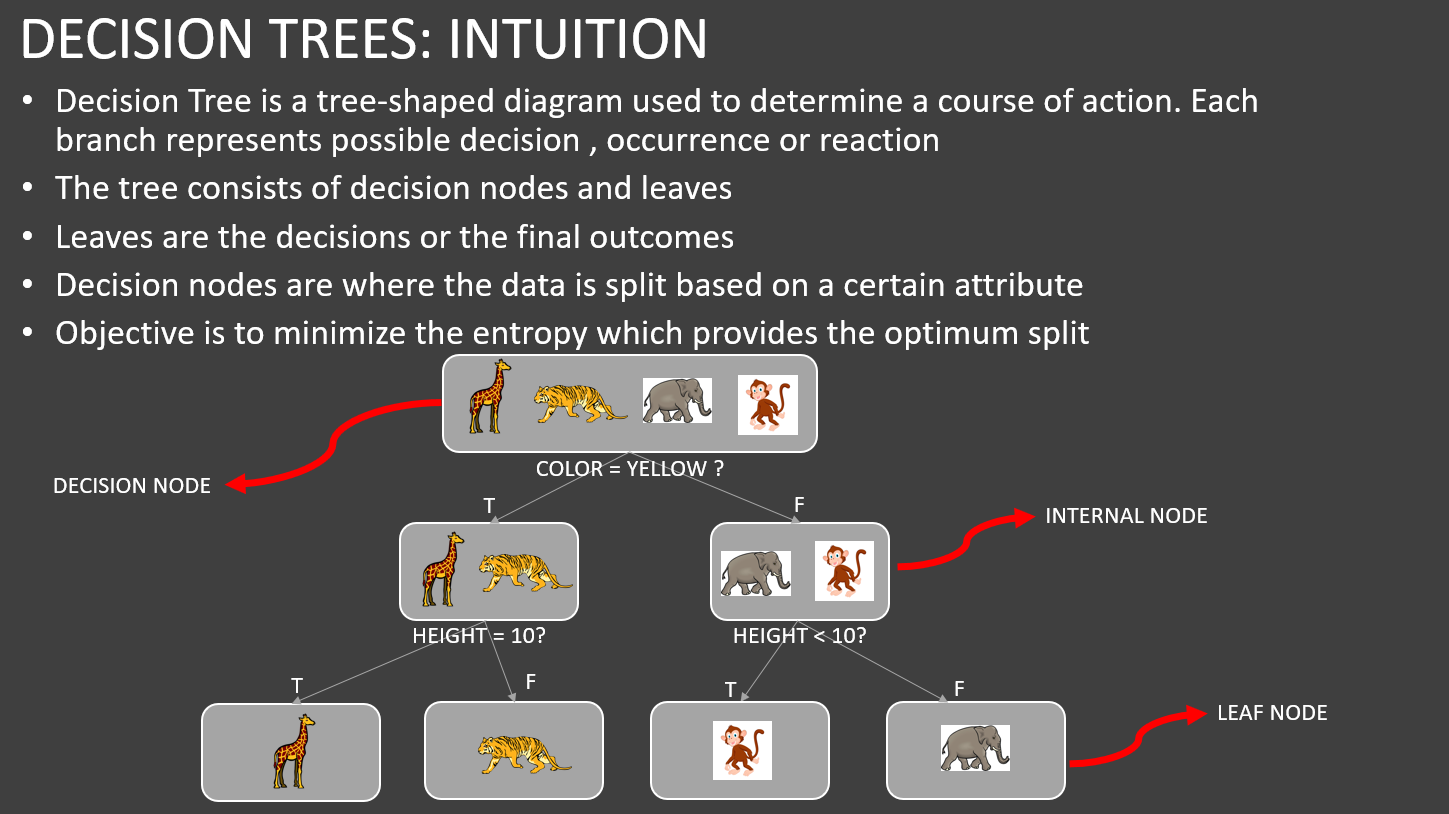

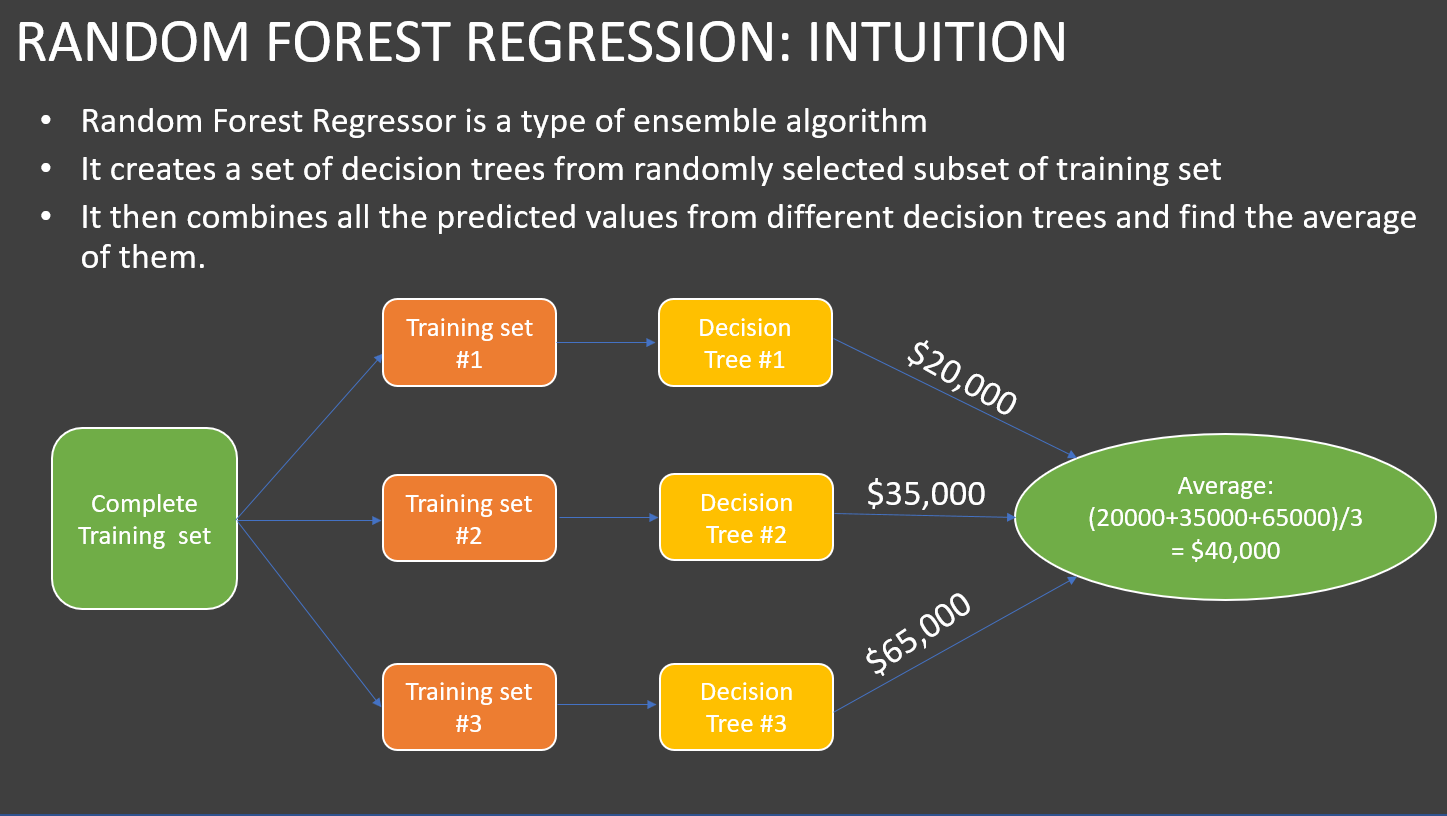

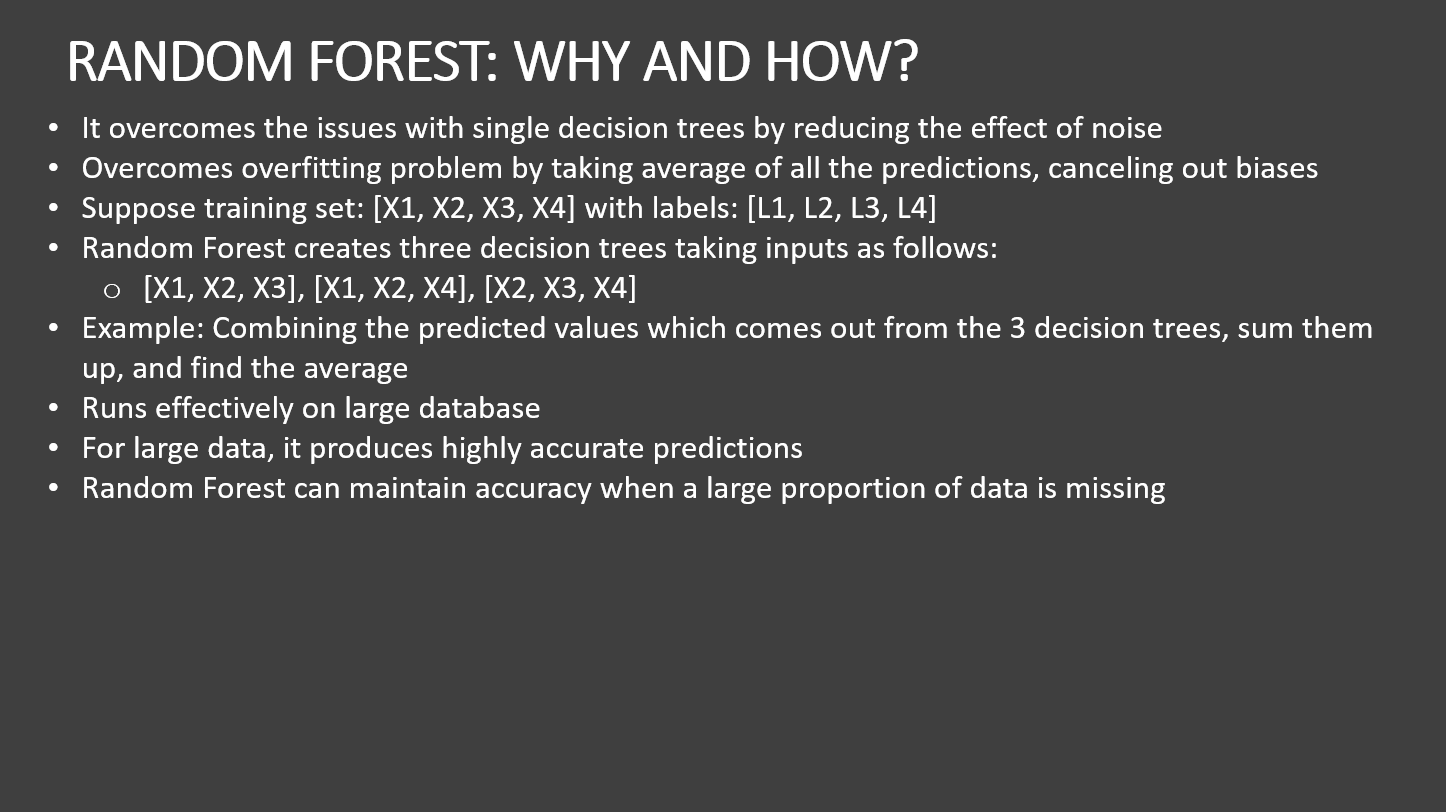

In [199]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model

DecisionTreeRegressor()

In [200]:
tree_model.fit(X_train,y_train)
tree_pred=tree_model.predict(X_test)

In [201]:
accuracy_DecisionTree = tree_model.score(X_test, y_test)
accuracy_DecisionTree

0.7867939773593149

In [202]:
from sklearn.ensemble import RandomForestRegressor

In [203]:
forest_model = RandomForestRegressor(max_depth= 5,n_estimators=2)
forest_model

RandomForestRegressor(max_depth=5, n_estimators=2)

In [204]:
forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=2)

In [205]:
accuracy_RandomForest= forest_model.score(X_test, y_test)
accuracy_RandomForest

0.7121711725675405

# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHING XG-BOOST ALGORITHM

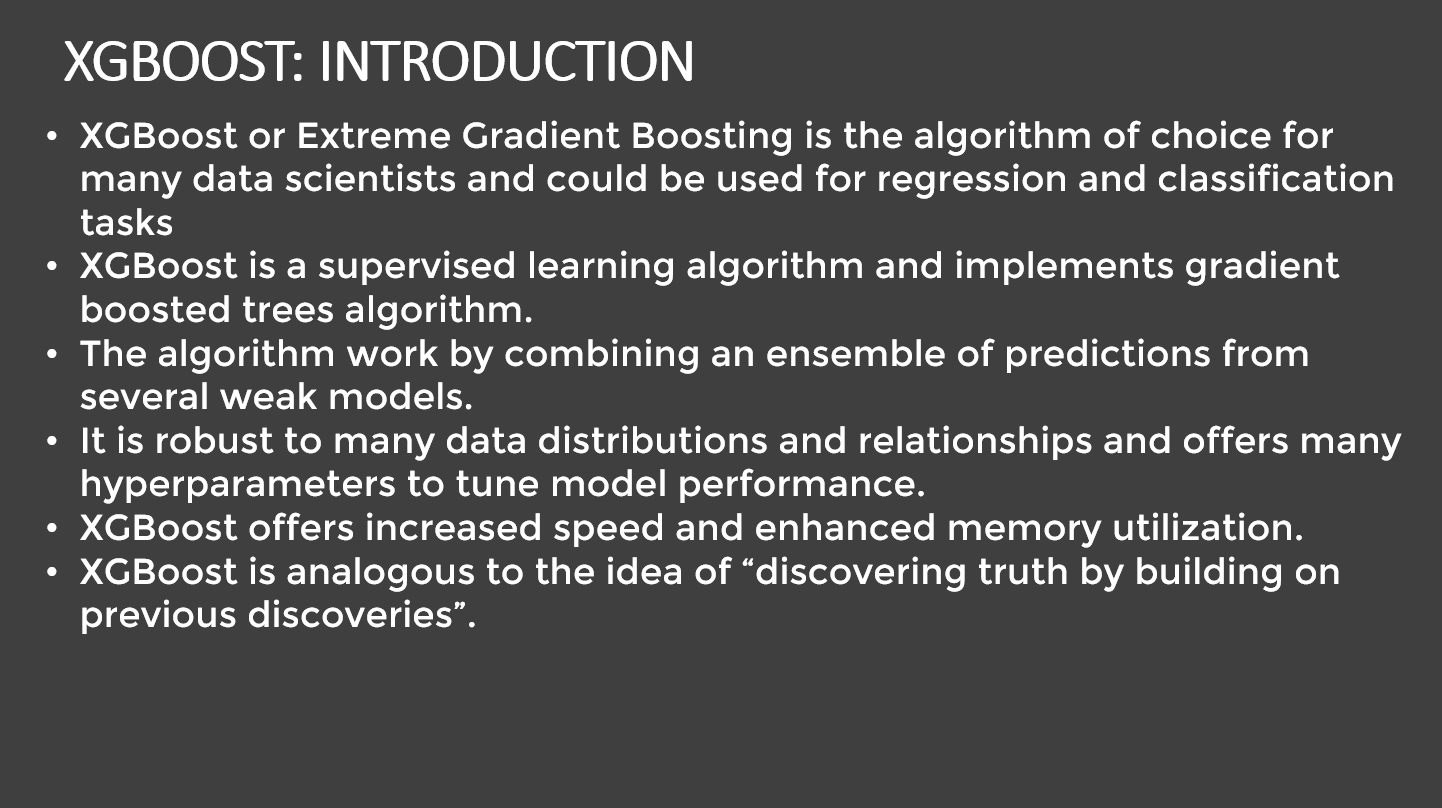

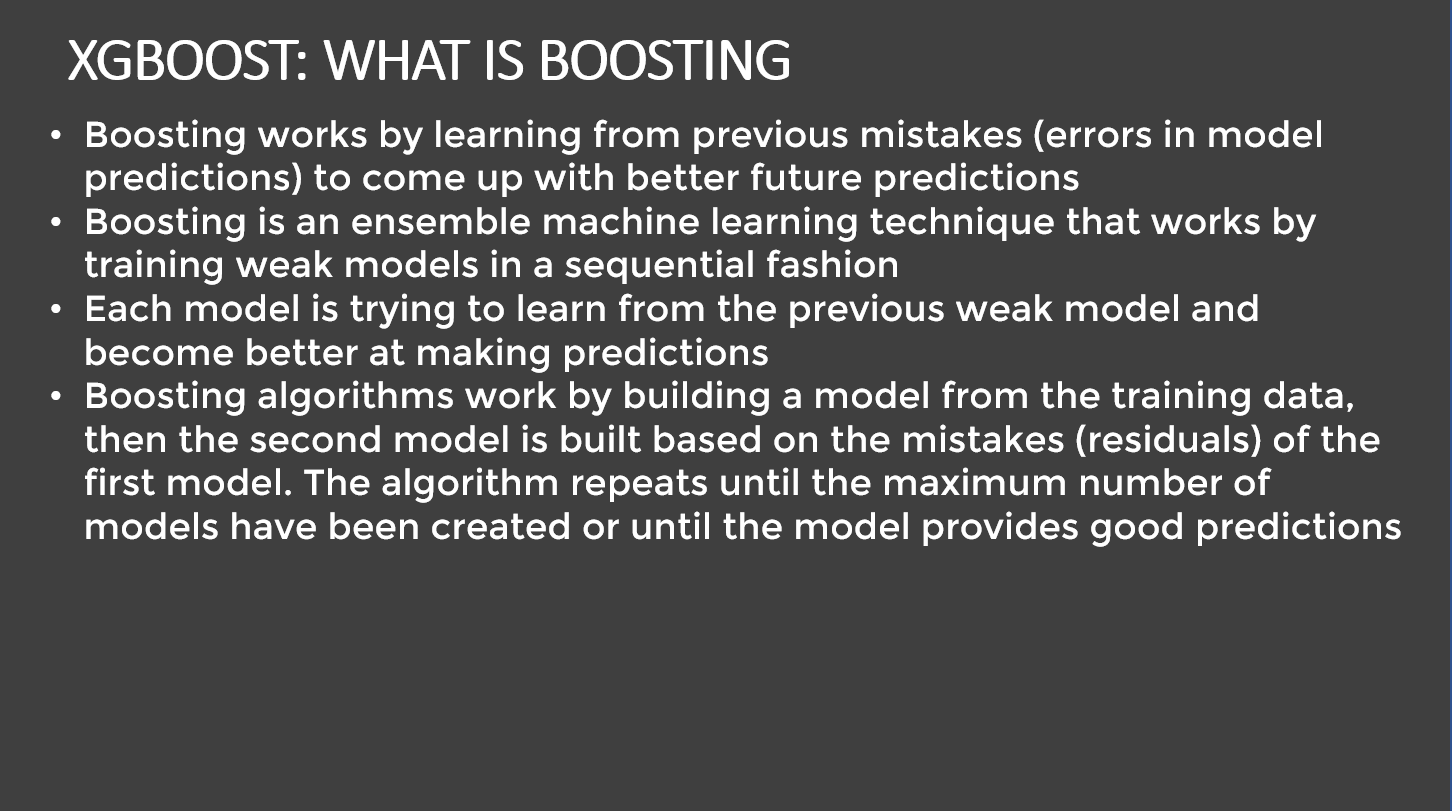

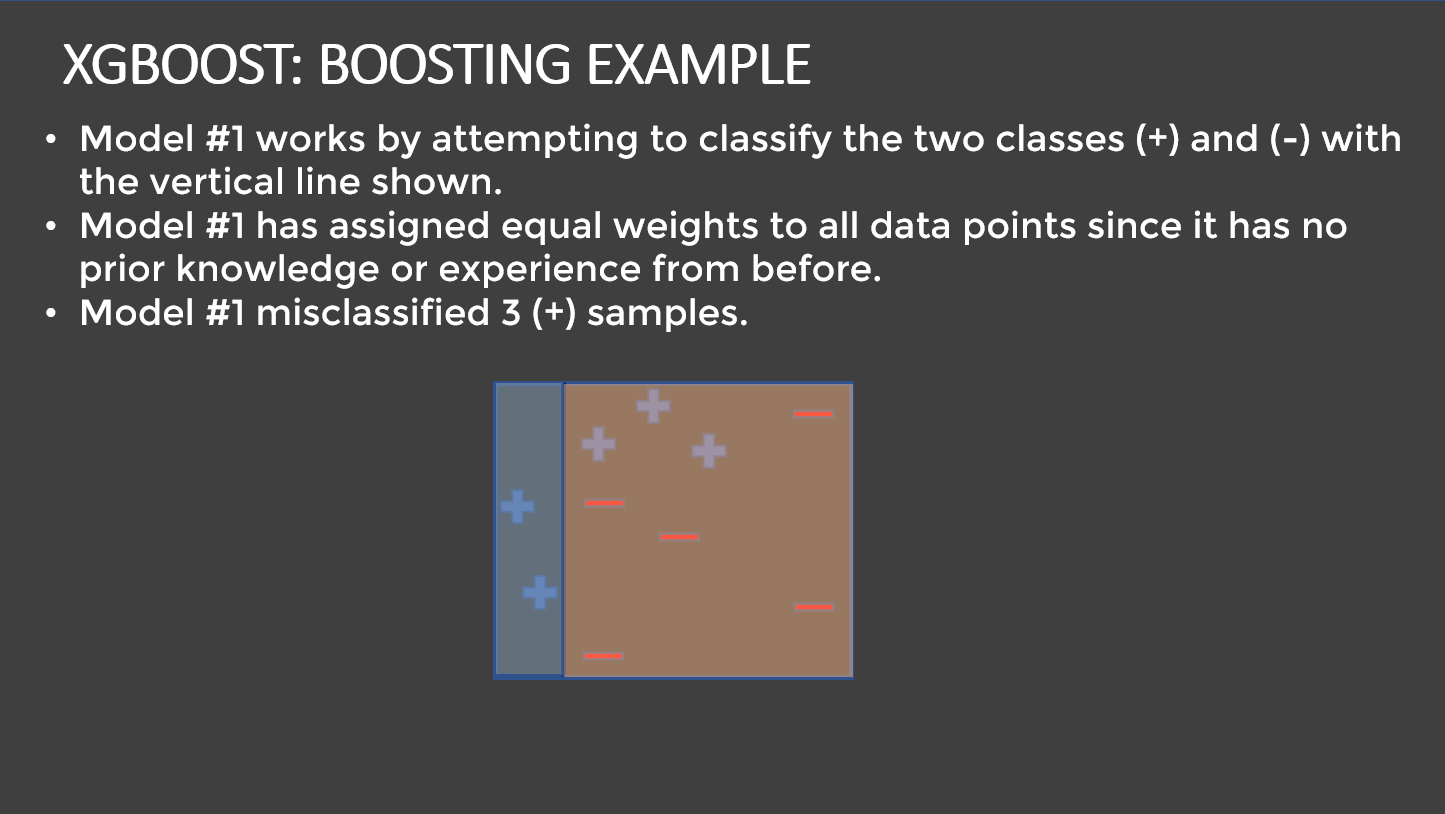

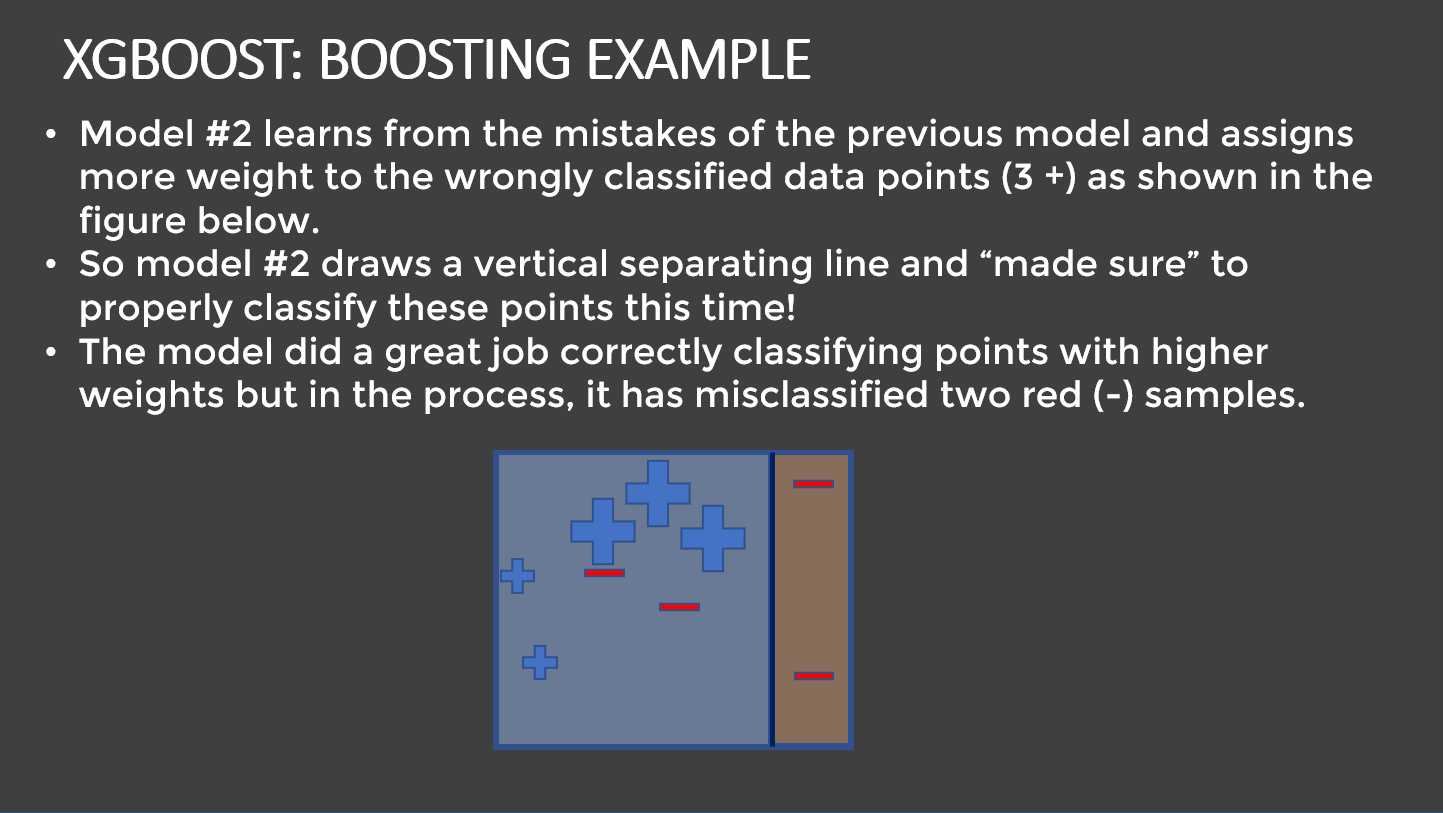

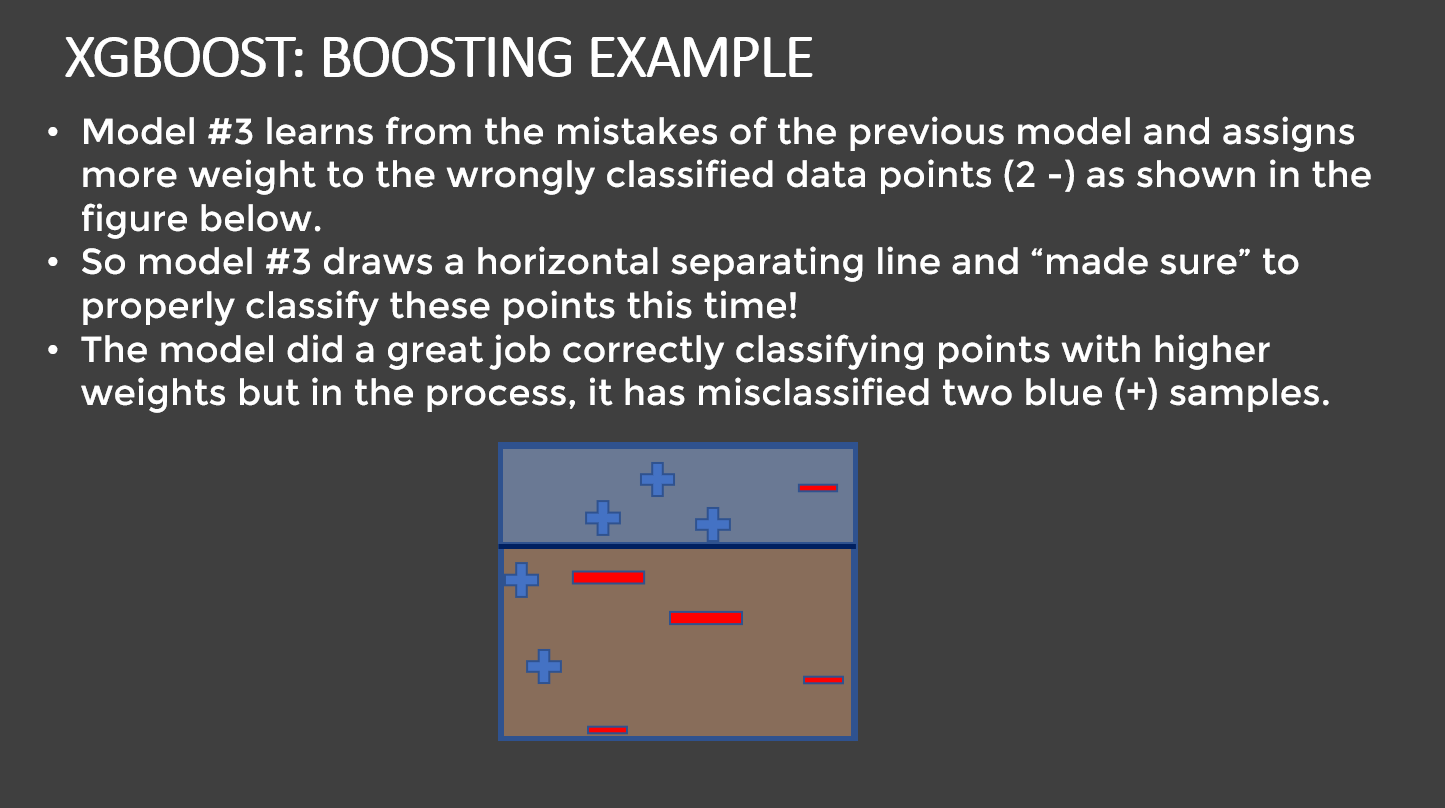

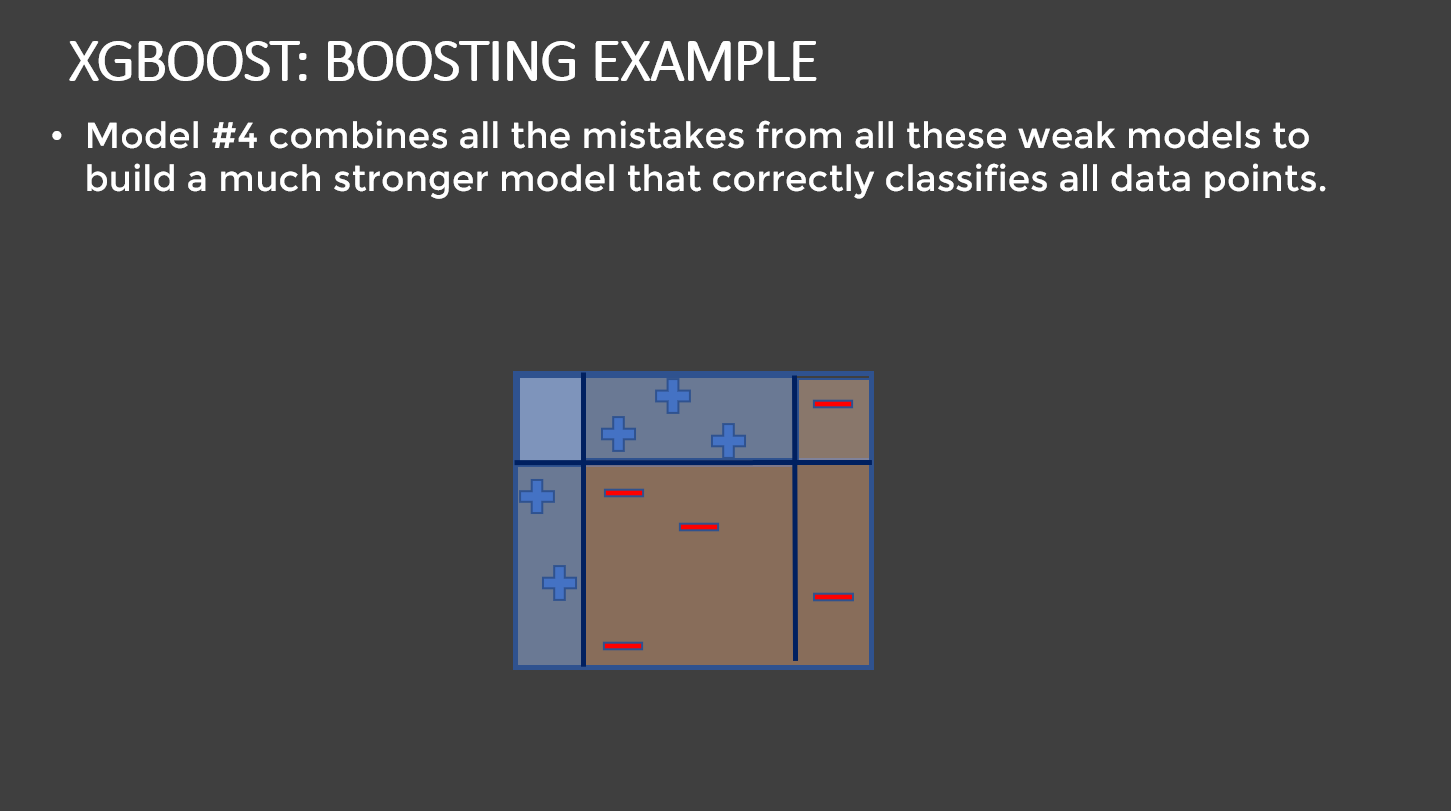

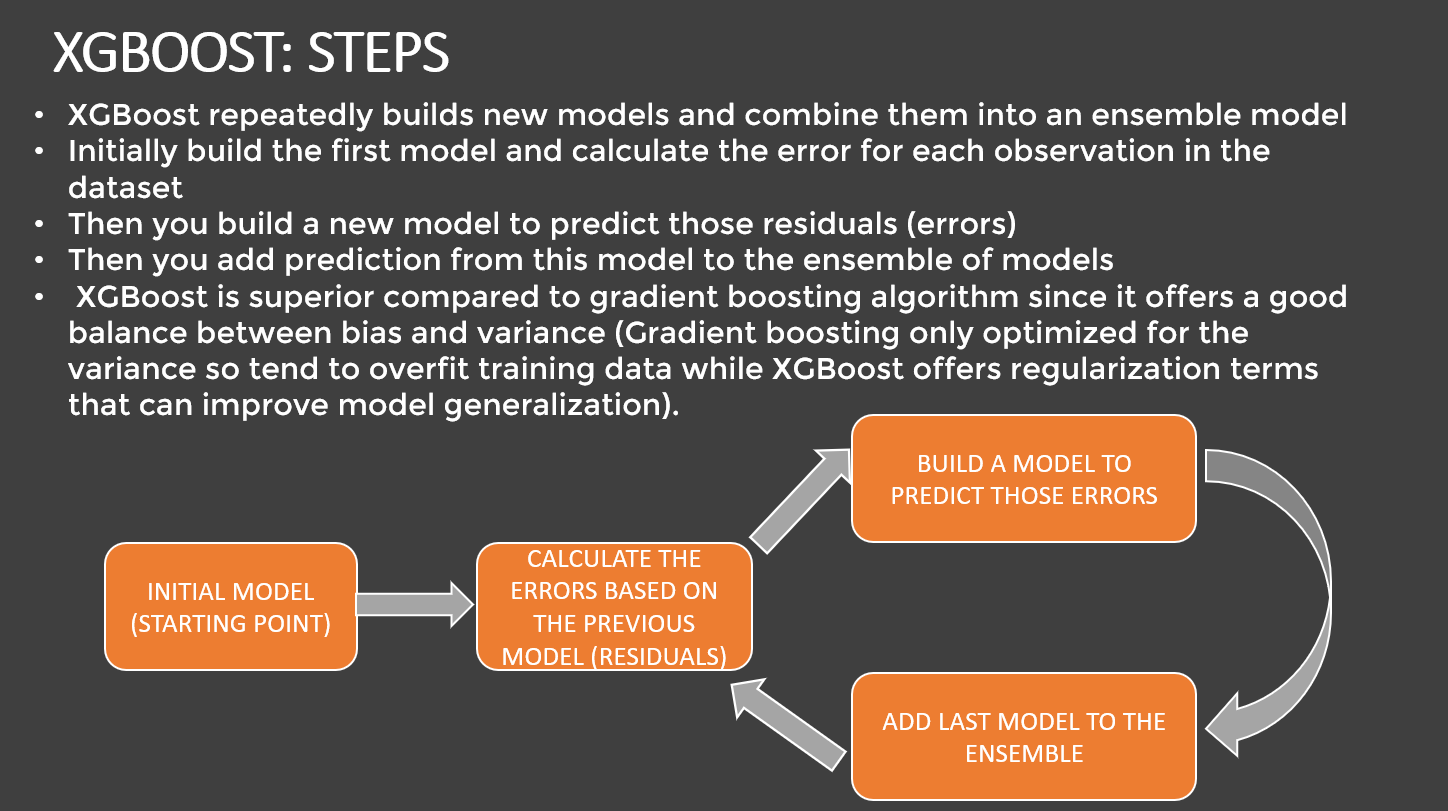

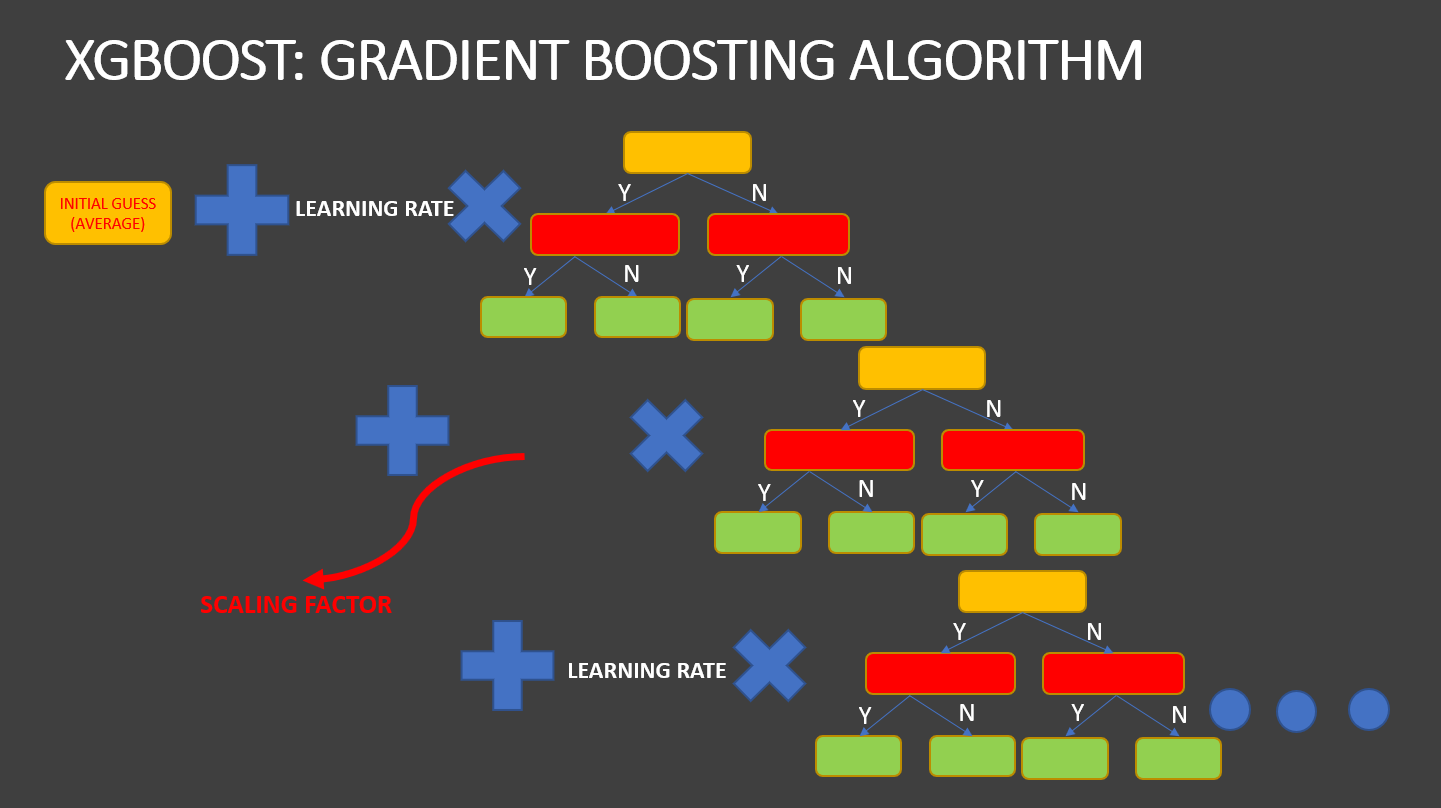

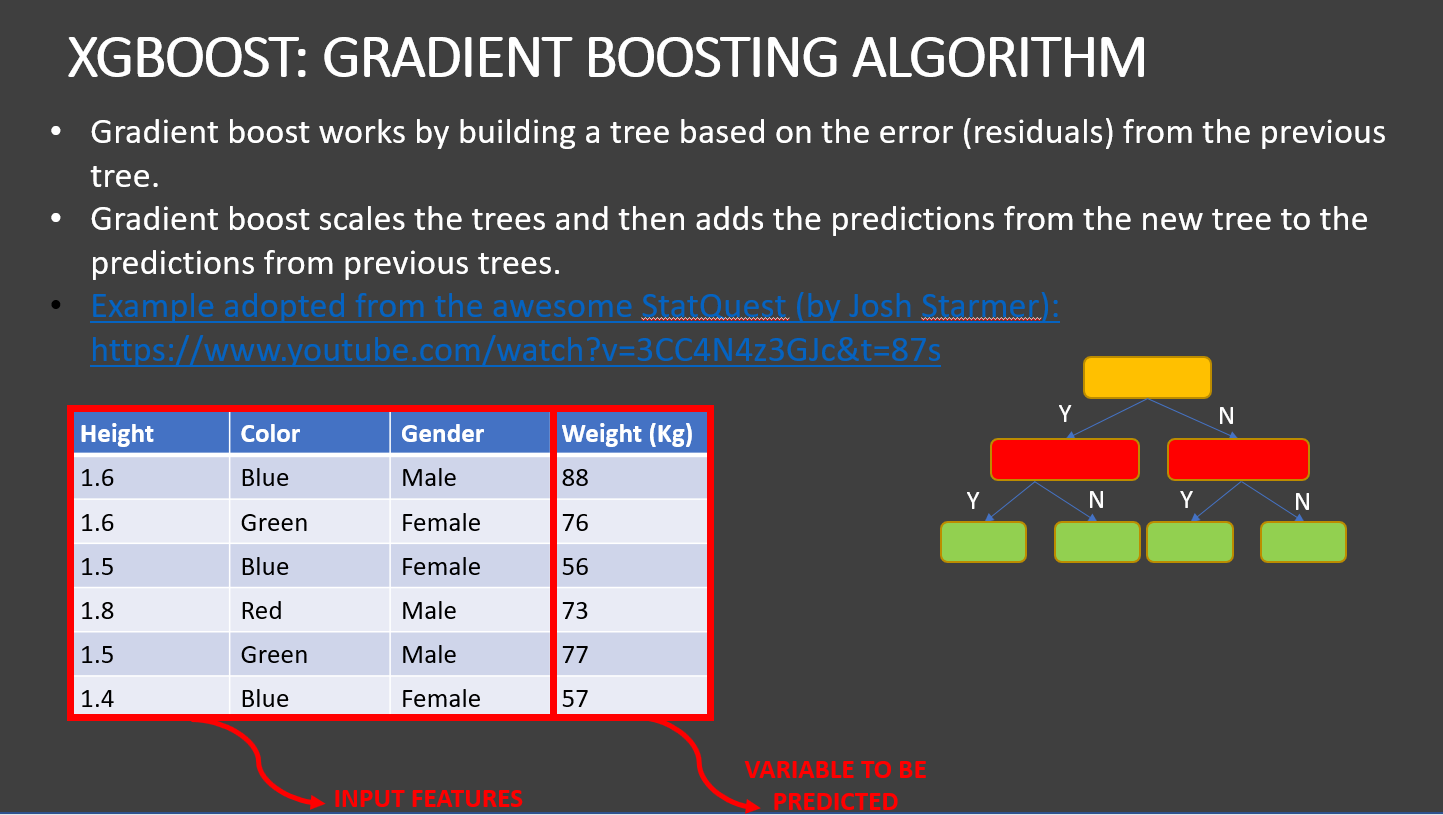

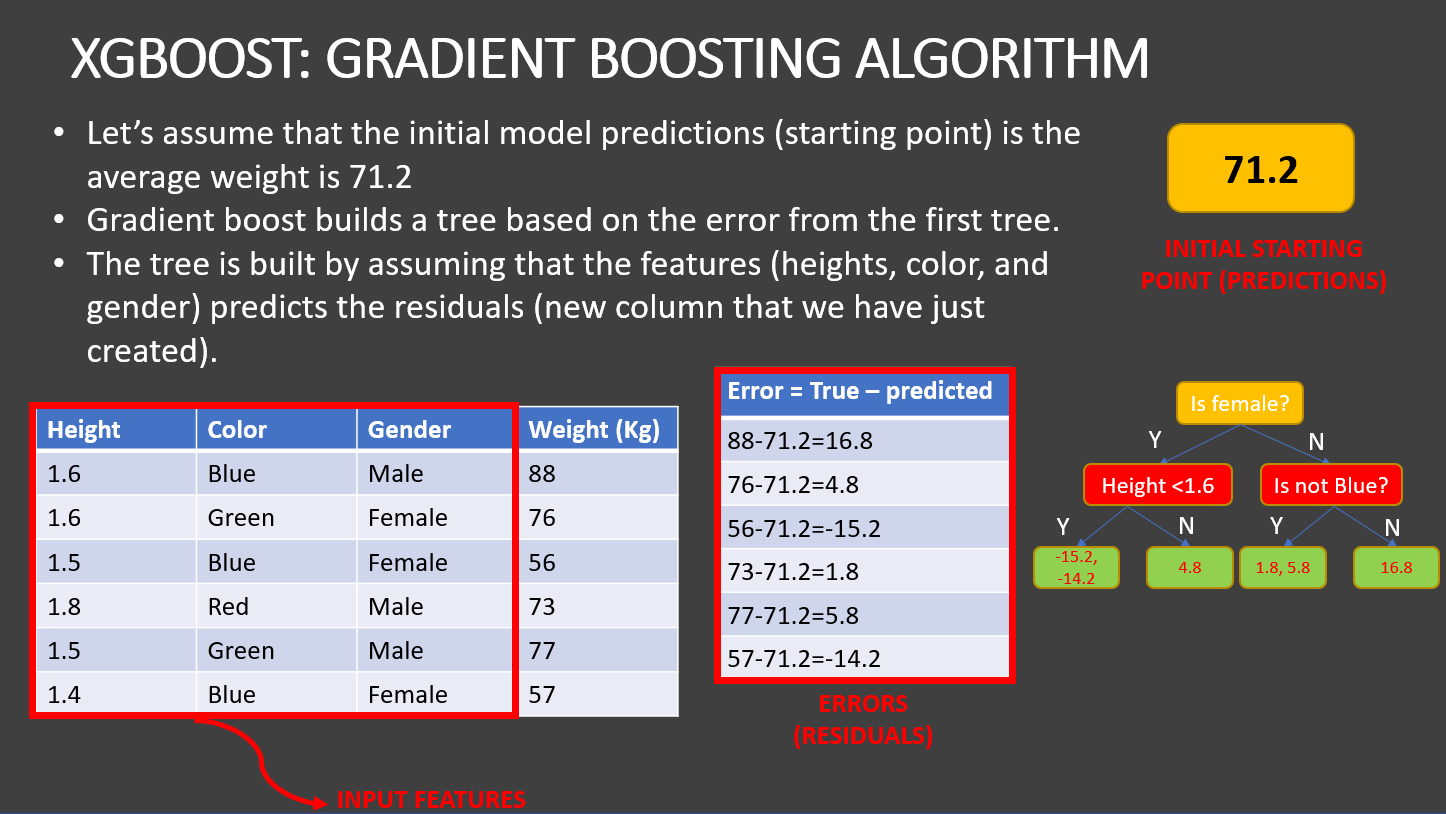

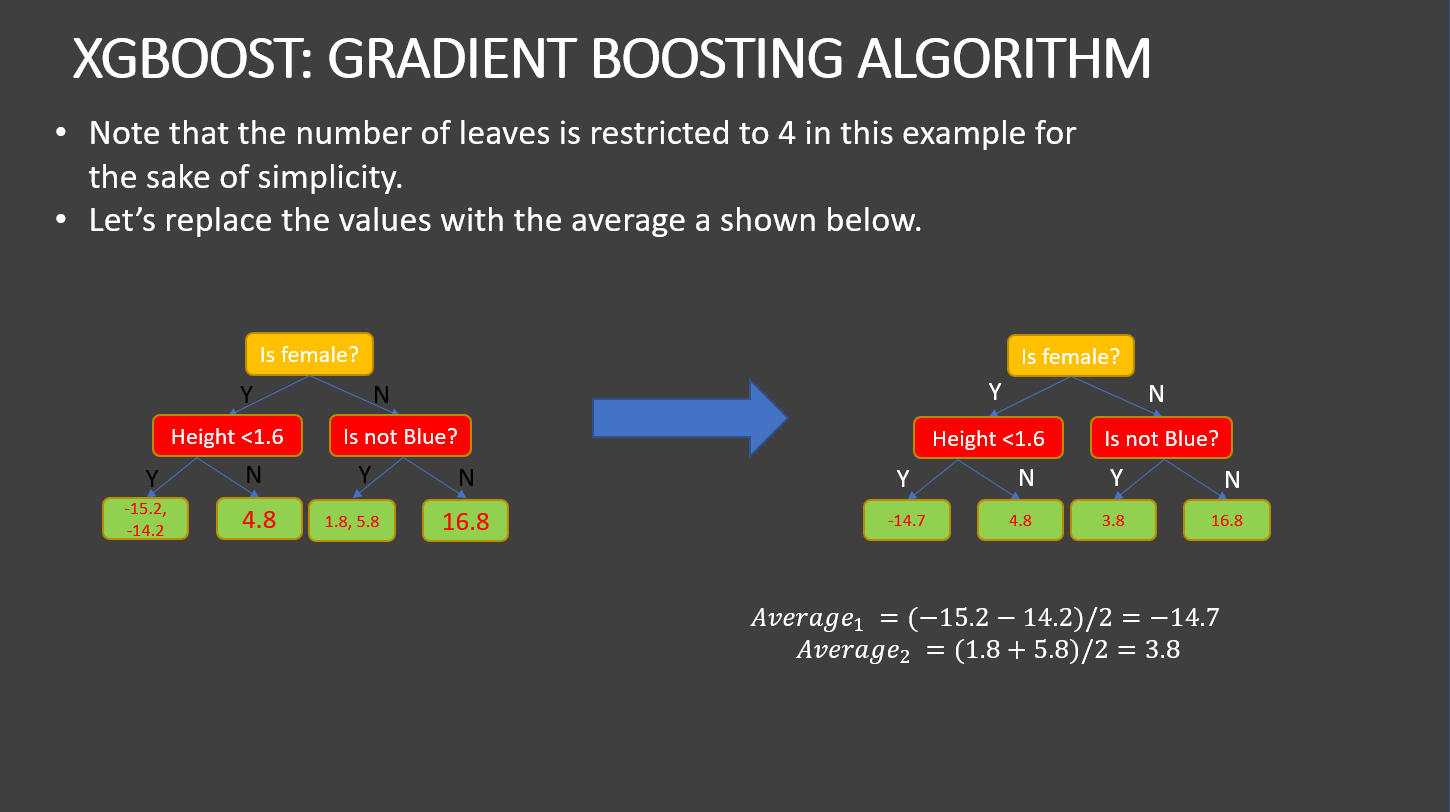

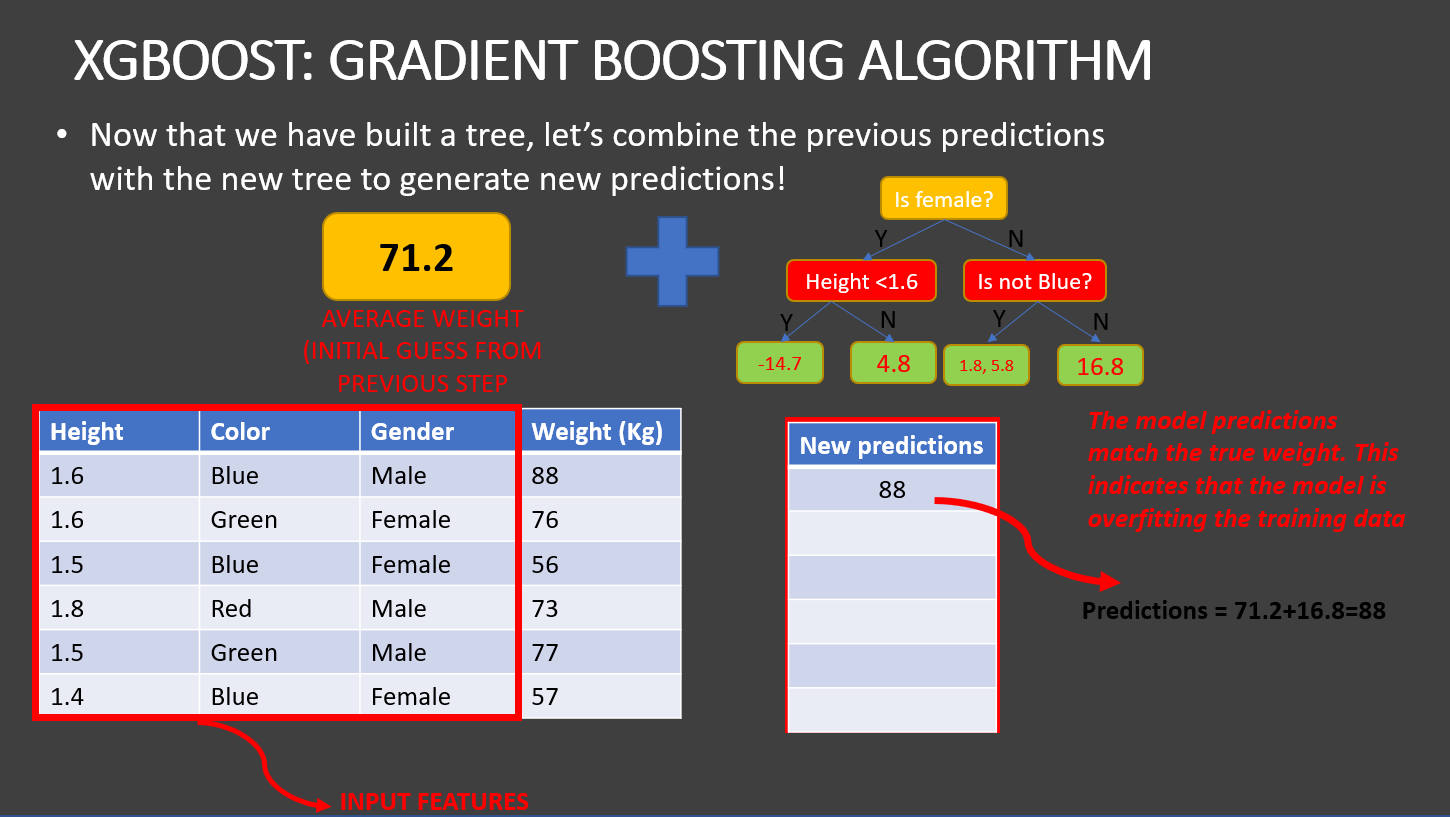

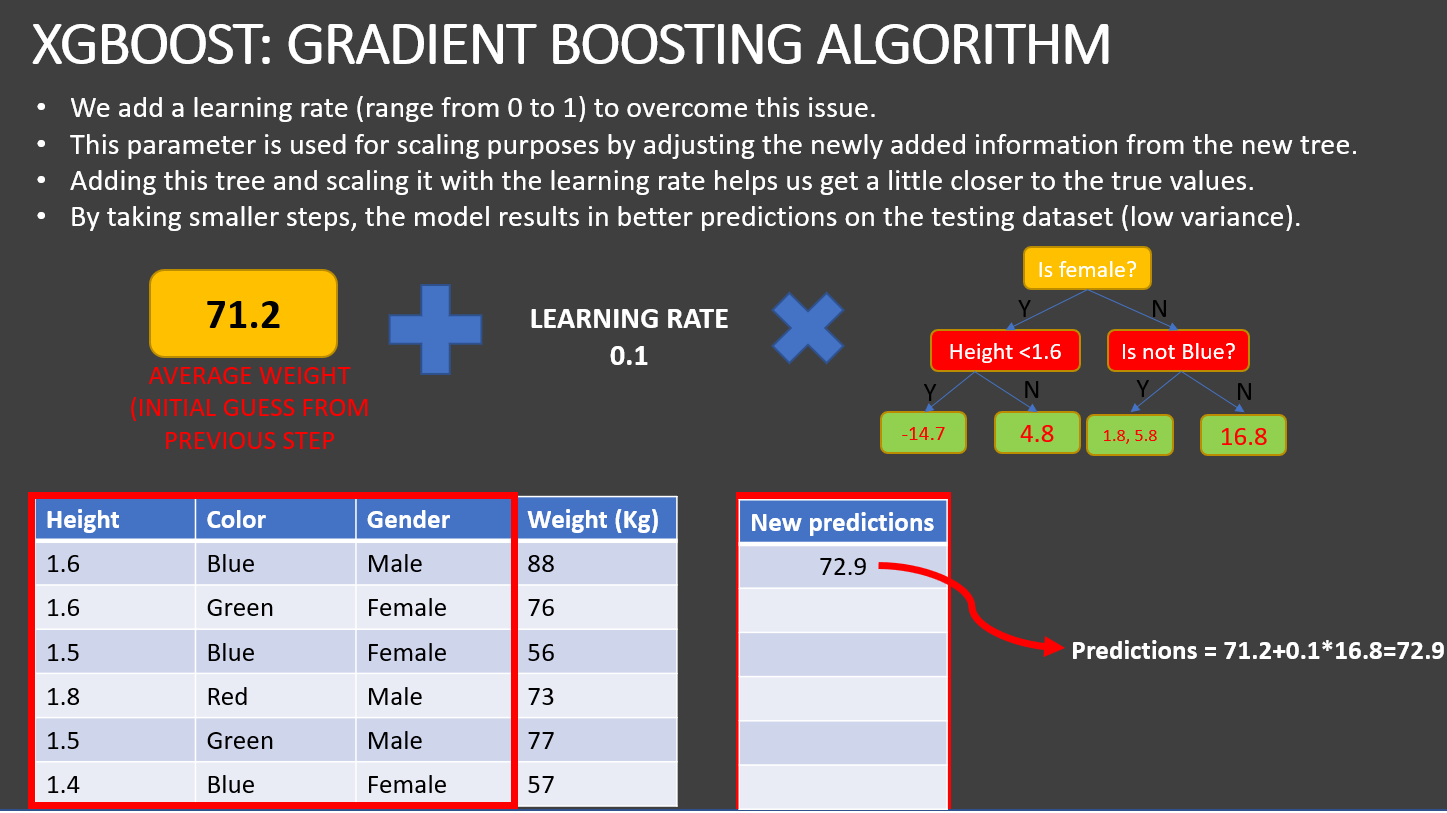

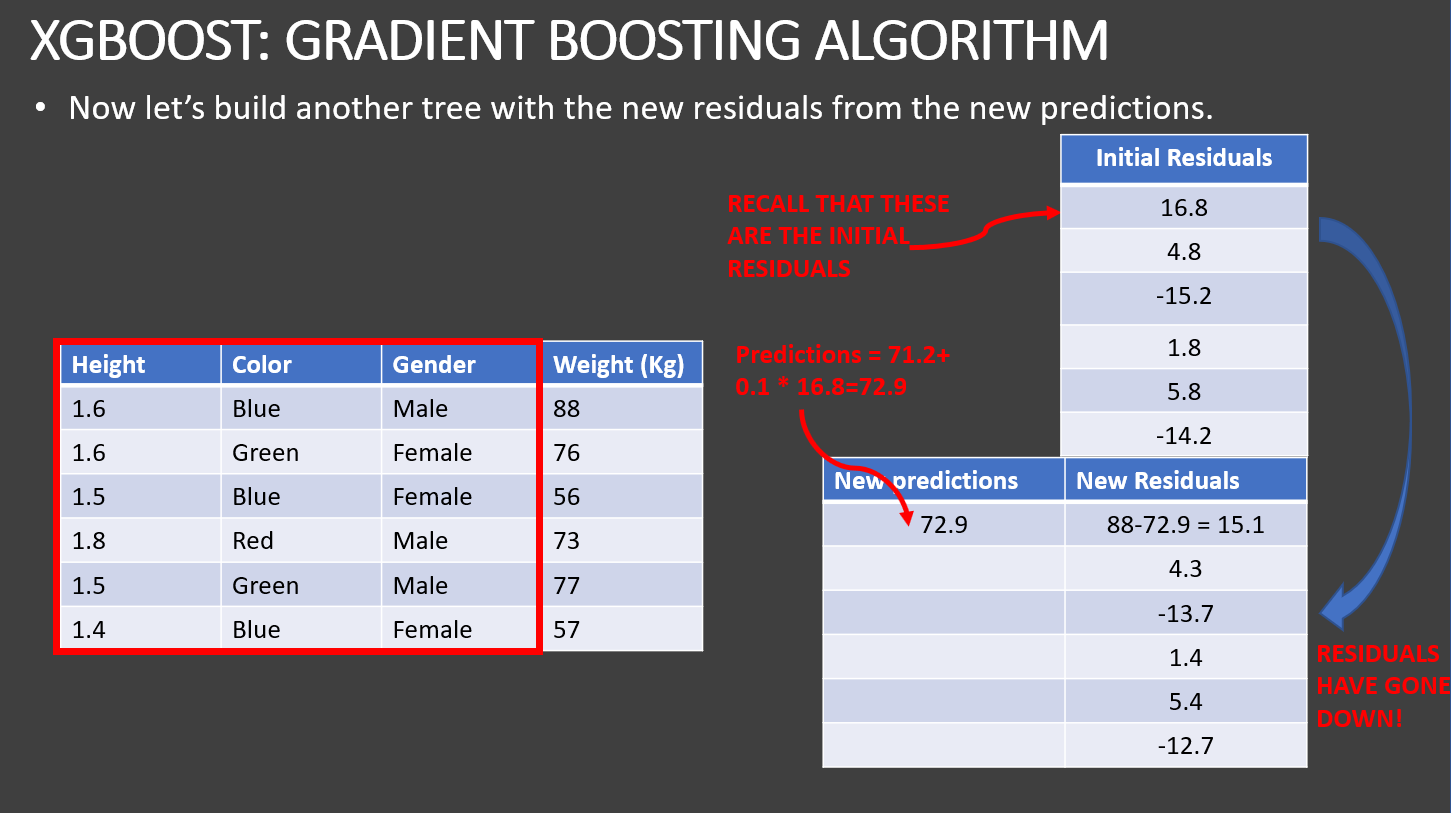

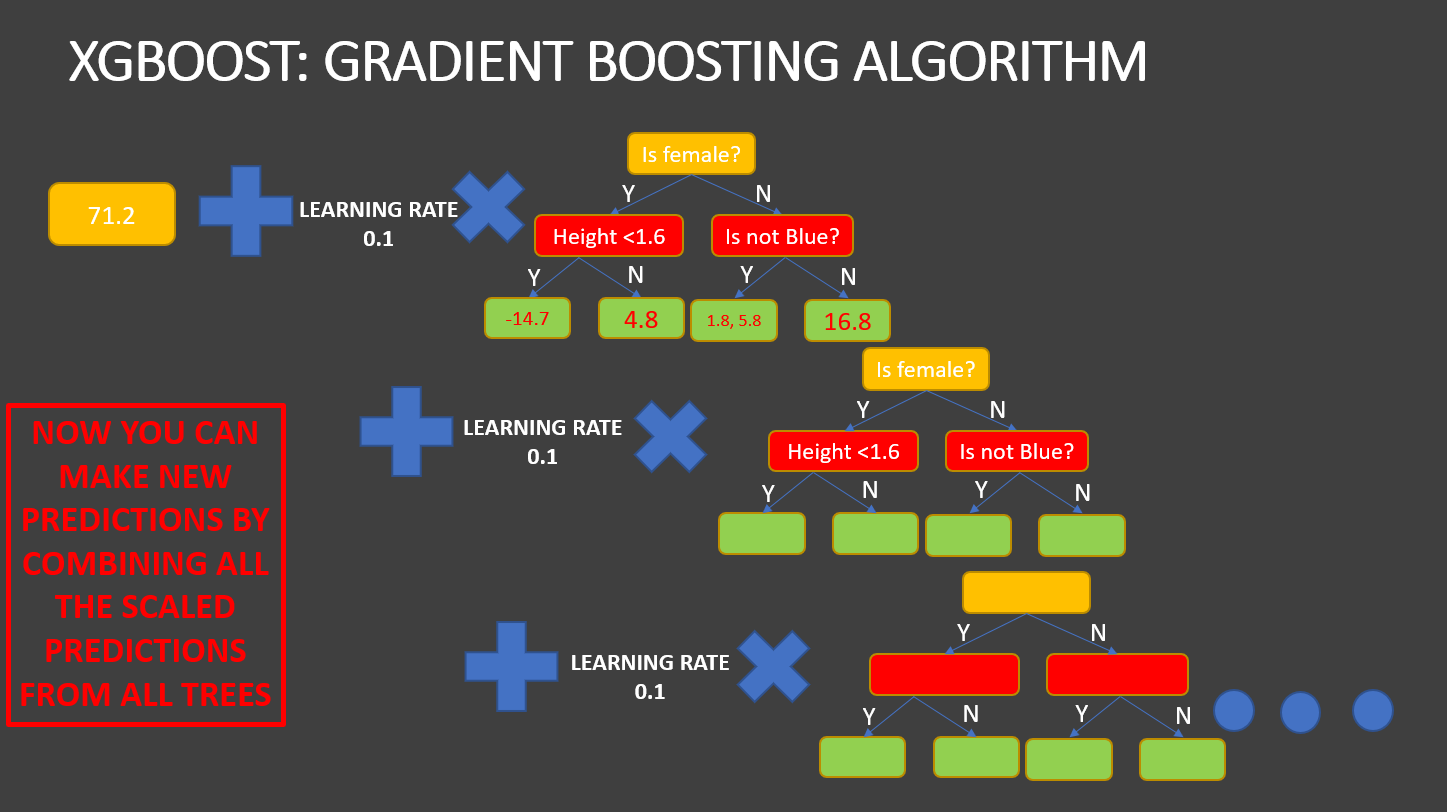

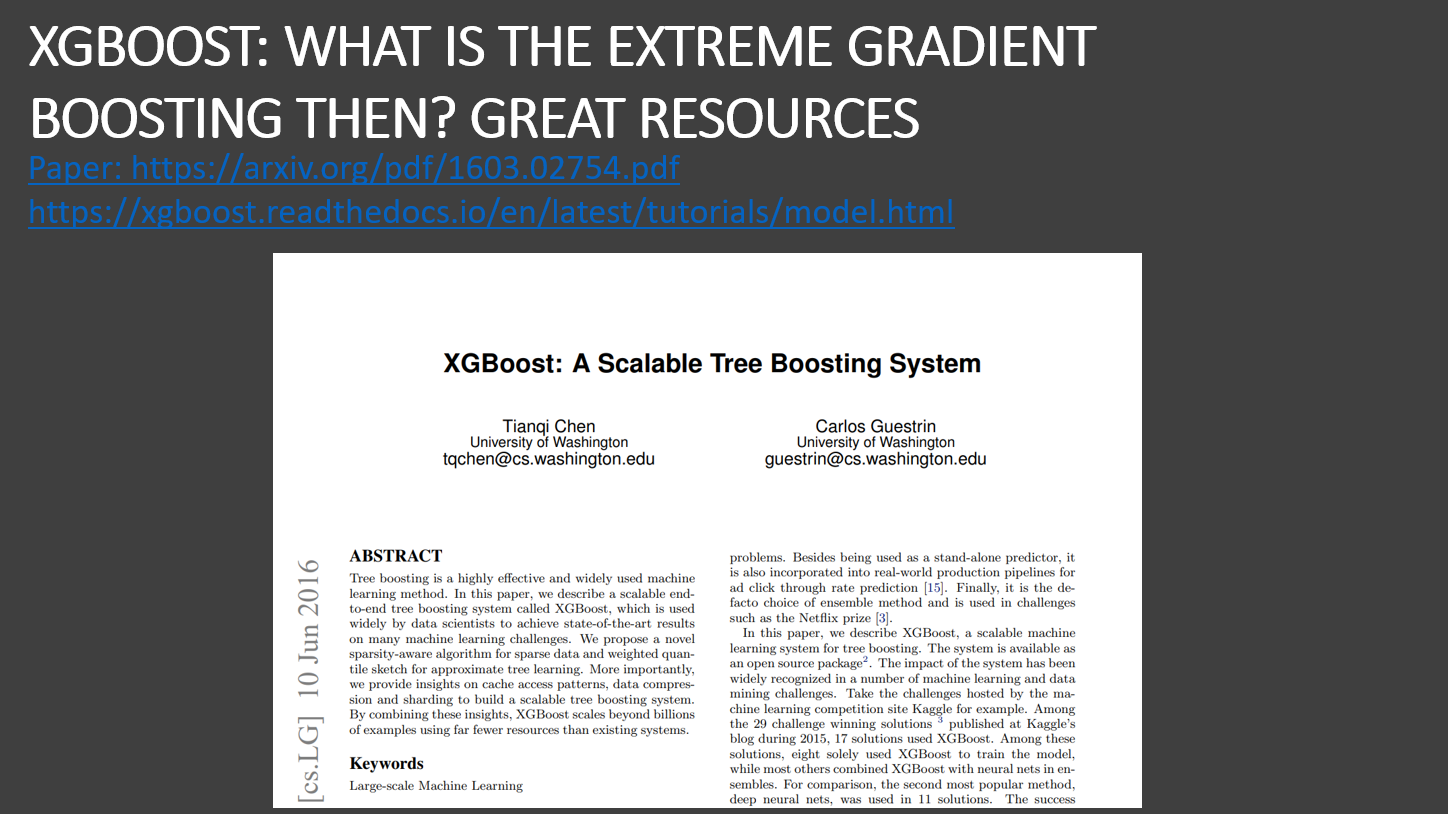

# TASK #8: TRAIN AN XG-BOOST REGRESSOR MODEL

In [206]:
from xgboost import XGBRegressor

In [207]:
xgb_model=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor=None, random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [208]:
xgb_model.fit(X_train,y_train)
xgb_pred= xgb_model.predict(X_test)

In [209]:
accuracy_XGBoost = xgb_model.score(X_test, y_test)


MINI CHALLENGE #6:

- Which regressor performed best?

In [210]:
accuracy_XGBoost,accuracy_RandomForest,accuracy_LinearRegression

# in our case the XGB regression performed the best 

(0.8361472449115095, 0.7121711725675405, 0.77874437702972)

# TASK #9: COMPARE MODELS AND CALCULATE REGRESSION KPIs

c:\Users\CYTech Student\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

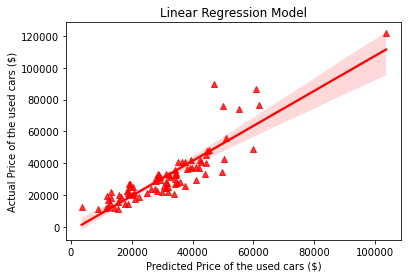

In [211]:
y_predict_linear = Lin_model.predict(X_test)

fig = sns.regplot(y_predict_linear, y_test, color = 'red', marker = "^")
fig.set(title = "Linear Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [212]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 8710.532 
MSE = 75873365.29447068 
MAE = 5808.204506878739 
R2 = 0.77874437702972


c:\Users\CYTech Student\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

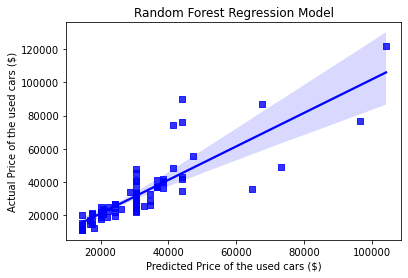

In [213]:
y_predict_RandomForest = forest_model.predict(X_test)

fig = sns.regplot(y_predict_RandomForest, y_test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel= "Actual Price of the used cars ($)")

In [214]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_RandomForest)
MAE= mean_absolute_error(y_test, y_predict_RandomForest)
r2= r2_score(y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 9934.927 
MSE = 98702765.03208059 
MAE = 5694.63400763013 
R2 = 0.7121711725675405


c:\Users\CYTech Student\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

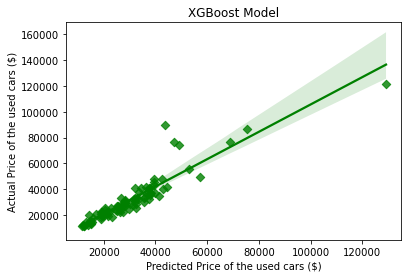

In [215]:
y_predict_XGBoost = xgb_model.predict(X_test)

fig = sns.regplot(y_predict_XGBoost, y_test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [216]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 7495.91 
MSE = 56188673.41963282 
MAE = 4054.082258357558 
R2 = 0.8361472449115095


From the ablove results, it is clearly shown that XGBoost model scores 83% accuracy which outperforms Linear Regression and Random Forest Regression models

# Difference between XGB and Random Forest ! 

Boosting happens to be iterative learning which means the model will predict something initially and self analyses its mistakes as a predictive toiler and give more weightage to the data points in which it made a wrong prediction in the next iteration. After the second iteration, it again self analyses its wrong predictions and gives more weightage to the data points which are predicted as wrong in the next iteration. This process continues as a cycle. Hence technically, if a prediction has been done, there is an at most surety that it did not happen as a random chance but with a thorough understanding and patterns in the data. Such a model that prevents the occurrences of predictions with a random chance is trustable most of the time.

Random forest is just a collection of trees in which each of them gives a prediction and finally, we collect the outputs from all the trees and considers the mean, median, or mode of this collection as the prediction of this forest depending upon the nature of data (either continues or categorical). At a high level, this seems to be fine but there are high chances that most of the trees could have made predictions with some random chances since each of the trees had their own circumstances like class imbalance, sample duplication, overfitting, inappropriate node splitting, etc.

